# Import data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/user_log-001.csv
/kaggle/input/user_info.csv
/kaggle/input/train.csv
/kaggle/input/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
user_info = pd.read_csv(r'/kaggle/input/user_info.csv')
user_log = pd.read_csv(r'/kaggle/input/user_log-001.csv')

# 1. Preprocessing


## 1.1. EDA user_info table

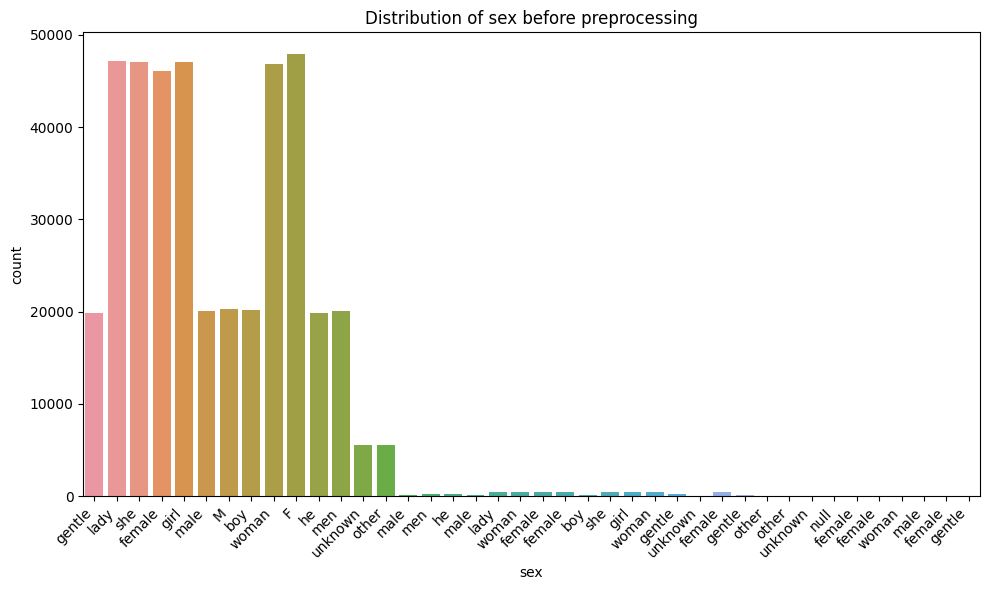

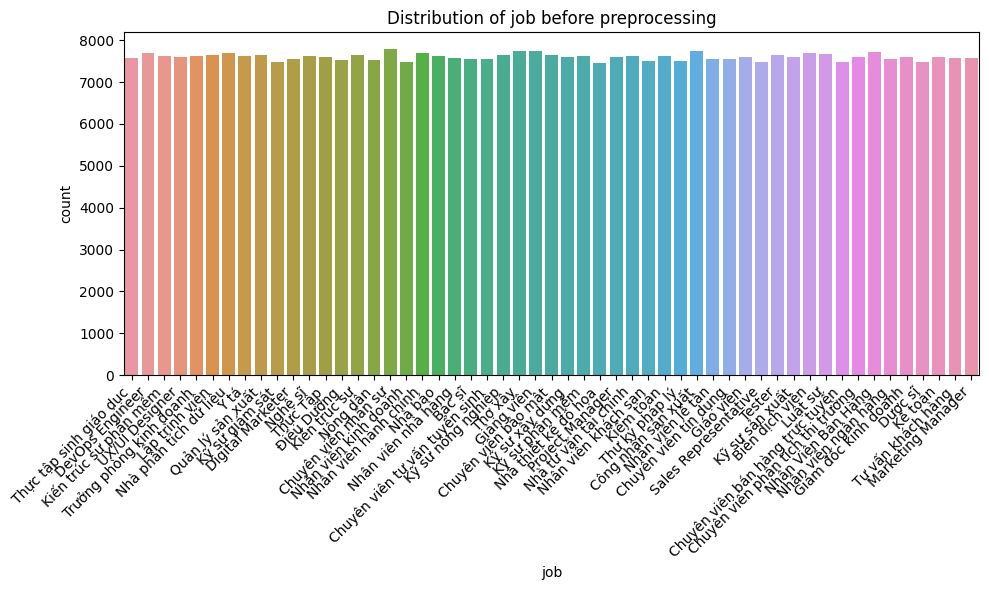

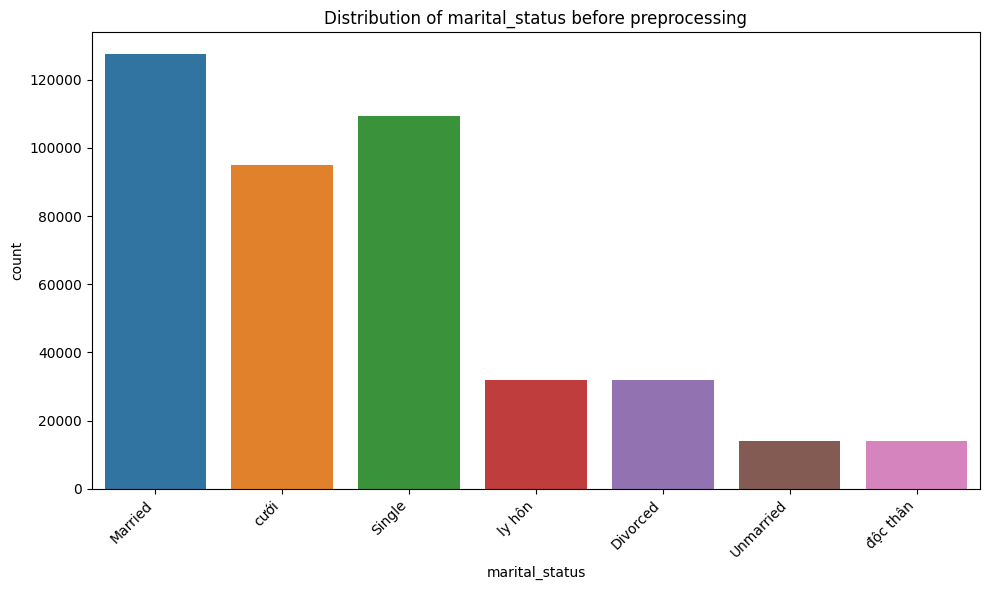

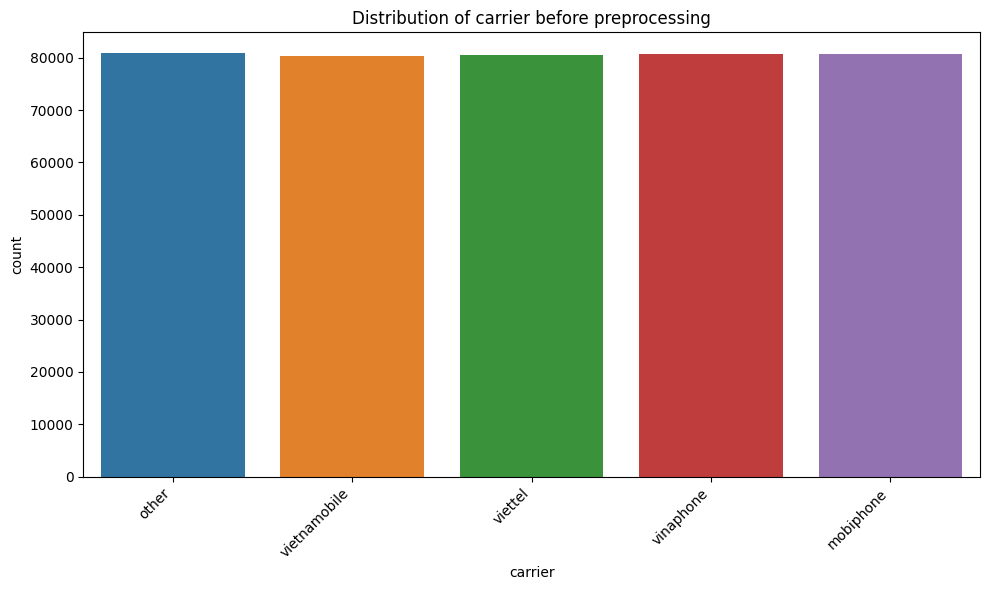

In [4]:
# Visualize distribution of sex, jobs, marital_status


categorical_cols = ['sex', 'job', 'marital_status', 'carrier']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=user_info, x=col)
    plt.title(f'Distribution of {col} before preprocessing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



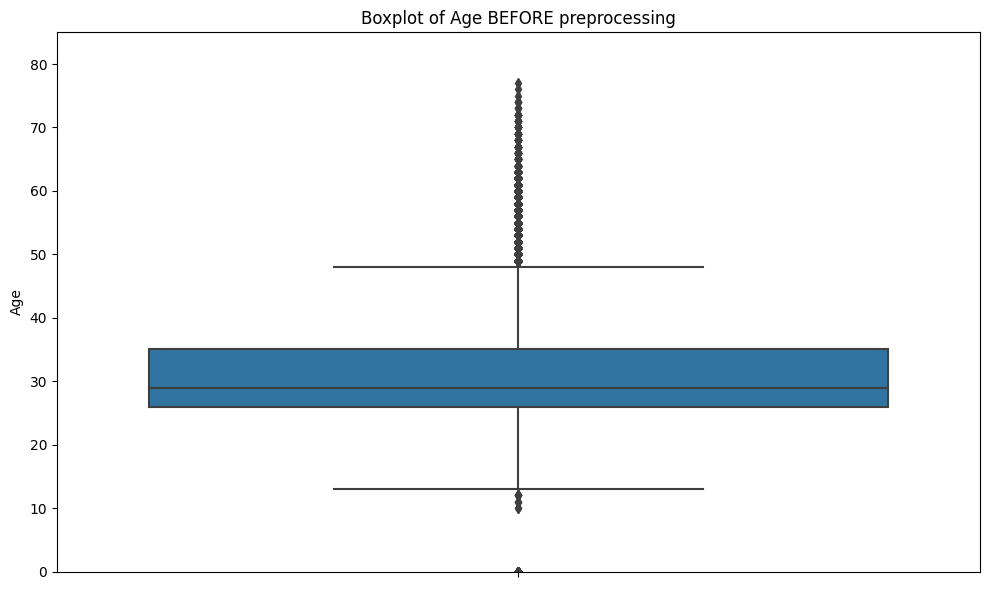

In [5]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_info, y='age')
plt.title('Boxplot of Age BEFORE preprocessing')
plt.ylabel('Age')
plt.ylim(0, 85)
plt.tight_layout()
plt.show()

In [6]:
# Print info of the preprocessed user_info DataFrame to check data types and non-null counts
print(user_info.info())
# Print descriptive statistics of the preprocessed user_info DataFrame
print(user_info.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         424170 non-null  int64  
 1   age             328803 non-null  float64
 2   sex             418652 non-null  object 
 3   phone           402962 non-null  object 
 4   job             402962 non-null  object 
 5   carrier         402962 non-null  object 
 6   marital_status  423813 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.7+ MB
None
              user_id            age     sex       phone                  job  \
count   424170.000000  328803.000000  418652      402962               402962   
unique            NaN            NaN      40       30000                   53   
top               NaN            NaN       F  ******4312  Chuyên viên nhân sự   
freq              NaN            NaN   47868          39                 7798   
mea

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## 1.2.Null values + outliers detection for user_info

In [7]:
import seaborn as sns

# filter outliers
Q1 = user_info['age'].quantile(0.25)
Q3 = user_info['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
user_info['age'] = user_info['age'].clip(lower=lower_bound, upper=upper_bound)

#fill NA for age
user_info['age'] = user_info['age'].fillna(user_info['age'].median())
print(lower_bound)
print(upper_bound)

12.5
48.5


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


In [8]:
# preprocess categorical features
sex_mapping = {'f': 'female', 'female': 'female', 'girl': 'female', 'lady': 'female', 'she': 'female',
               'woman': 'female', 'femаle': 'female', 'gіrl': 'female', 'womаn': 'female', 'shе': 'female',
               'fеmale': 'female', 'lаdy': 'female', 'femalе': 'female', 'femаlе': 'female', 'fеmаle': 'female',
               'wοman': 'female', 'm': 'male', 'male': 'male', 'he': 'male', 'boy': 'male', 'men': 'male',
               'gentle': 'male', 'gеntle': 'male', 'gentlе': 'male', 'hе': 'male', 'mеn': 'male', 'mаle': 'male',
               'gеntlе': 'male', 'bοy': 'male', 'malе': 'male', 'other': 'unknown', 'othеr': 'unknown',
               'οther': 'unknown', 'սnknown': 'unknown', 'unknοwn': 'unknown', 'null': 'unknown', 'unknown': 'unknown'}

user_info['sex'] = user_info['sex'].str.lower().map(sex_mapping).fillna('unknown')

user_info['job'] = user_info['job'].fillna('unknown')


marital_mapping = {'married': 'Married', 'cưới': 'Married', 'single': 'Single', 'unmarried': 'Single',
                   'độc thân': 'Single', 'divorced': 'Divorced', 'ly hôn': 'Divorced'}
user_info['marital_status'] = user_info['marital_status'].str.lower().map(marital_mapping).fillna('unknown')

# drop unnecessary columns

user_info = user_info.drop('carrier',axis=1)
user_info = user_info.drop('phone',axis=1)

### Use for many variable plot

In [9]:
user_plot_HT_info = user_info
user_plot_HT_info
user_df = user_info

In [10]:
columns_to_drop = ['marital_status', 'job']
user_plot_info = user_info.drop(columns_to_drop,axis=1)
user_plot_info

,user_id,age,sex
0,376517,44.0,male
1,234512,39.0,female
2,344532,39.0,female
3,186135,37.0,female
4,30230,38.0,female
...,...,...,...
424165,395814,26.0,male
424166,245950,29.0,male
424167,208016,29.0,unknown
424168,272535,45.0,male


## EDA AFTER preprocessing for user_info table

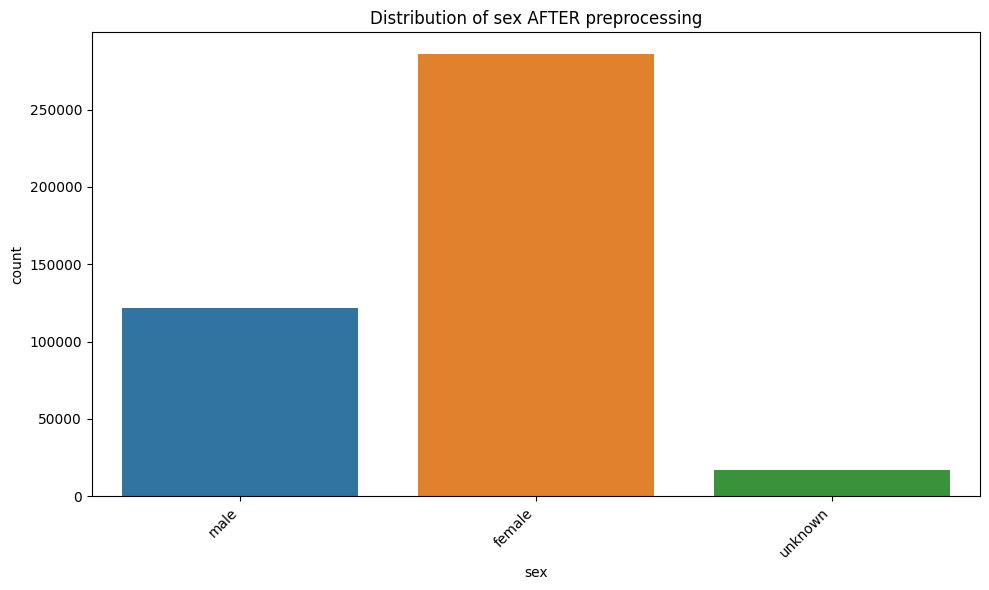

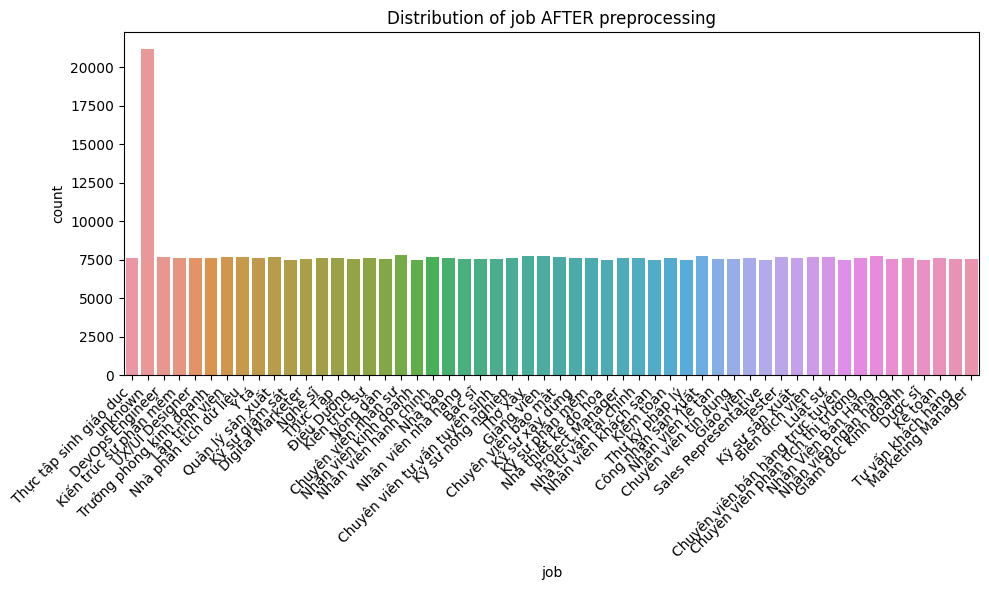

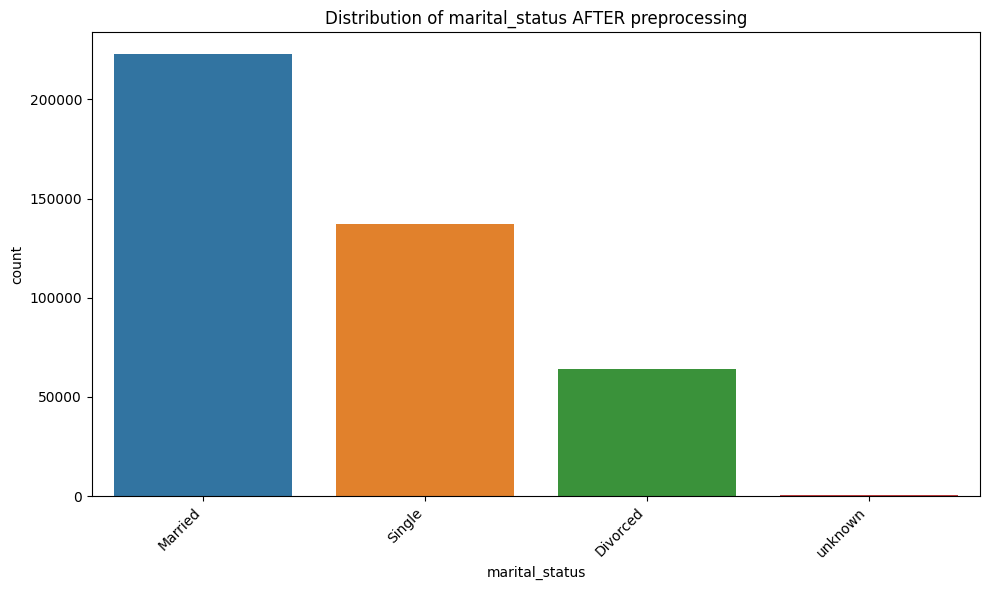

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['sex', 'job', 'marital_status']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=user_info, x=col)
    plt.title(f'Distribution of {col} AFTER preprocessing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


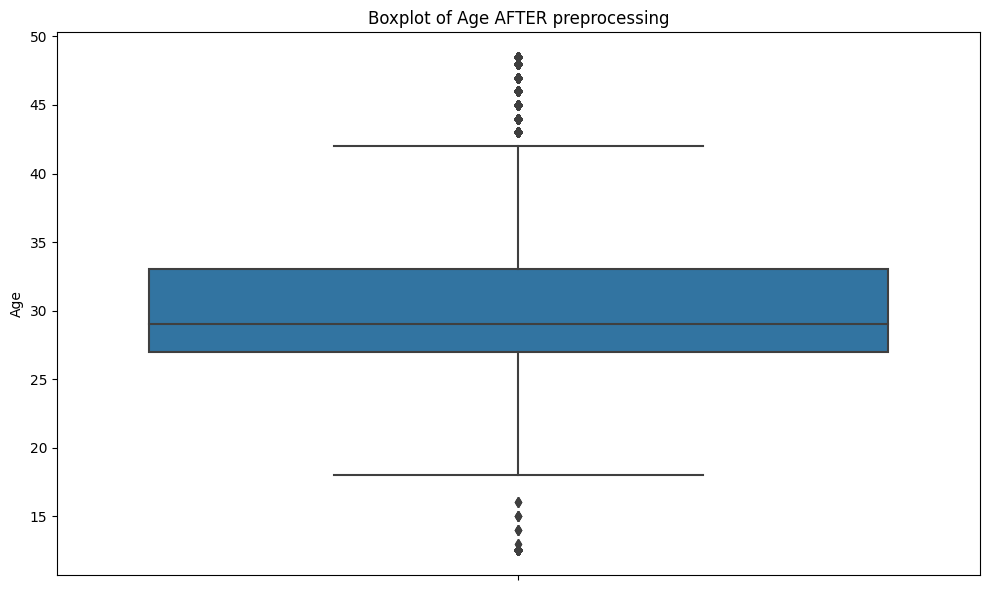

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_info, y='age')
plt.title('Boxplot of Age AFTER preprocessing')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


In [13]:
# Print info of the preprocessed user_info DataFrame to check data types and non-null counts
print(user_info.info())
# Print descriptive statistics of the preprocessed user_info DataFrame
print(user_info.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         424170 non-null  int64  
 1   age             424170 non-null  float64
 2   sex             424170 non-null  object 
 3   job             424170 non-null  object 
 4   marital_status  424170 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 16.2+ MB
None
              user_id            age     sex      job marital_status
count   424170.000000  424170.000000  424170   424170         424170
unique            NaN            NaN       3       54              4
top               NaN            NaN  female  unknown        Married
freq              NaN            NaN  285632    21208         222625
mean    212085.500000      30.380874     NaN      NaN            NaN
std     122447.476178       6.730731     NaN      NaN            NaN
min          1.00

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## user_log table

In [14]:
user_log

,user_id,item_id,cat_id,brand_id,merchant_id,action,datetime
0,328862,323294,833,2661.0,2882,click,2024-08-29
1,328862,844400,1271,2661.0,2882,click,2024-08-29
2,328862,575153,1271,2661.0,2882,click,2024-08-29
3,328862,996875,1271,2661.0,2882,click,2024-08-29
4,328862,1086186,1271,1049.0,1253,click,2024-08-29
...,...,...,...,...,...,...,...
54925325,208016,107662,898,7995.0,1346,click,2024-11-10
54925326,208016,1058313,898,7995.0,1346,click,2024-11-10
54925327,208016,449814,898,7995.0,983,click,2024-11-10
54925328,208016,634856,898,7995.0,1346,click,2024-11-10


In [15]:
columns_to_drop1 = ['item_id', 'cat_id', 'brand_id', 'merchant_id']
user_plot_log = user_log.drop(columns_to_drop1, axis=1)
user_plot_log  

,user_id,action,datetime
0,328862,click,2024-08-29
1,328862,click,2024-08-29
2,328862,click,2024-08-29
3,328862,click,2024-08-29
4,328862,click,2024-08-29
...,...,...,...
54925325,208016,click,2024-11-10
54925326,208016,click,2024-11-10
54925327,208016,click,2024-11-10
54925328,208016,click,2024-11-10


In [16]:
# chcek count null value of user_id, item_id, cat_id, brand_id_merchant_id

print("Null values in user_log:")
print(user_log[['user_id', 'item_id', 'cat_id', 'brand_id', 'merchant_id', 'action']].isnull().sum())

Null values in user_log:
user_id            0
item_id            0
cat_id             0
brand_id       91015
merchant_id        0
action             0
dtype: int64


In [17]:
user_log['brand_id'] = user_log['brand_id'].fillna('unknown')

In [18]:
print("Null values in user_log:")
print(user_log[['brand_id']].isnull().sum())

Null values in user_log:
brand_id    0
dtype: int64


In [19]:
# Print info of the preprocessed user_info DataFrame to check data types and non-null counts
print(user_log.info())
# Print descriptive statistics of the preprocessed user_info DataFrame
print(user_log.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   item_id      int64 
 2   cat_id       int64 
 3   brand_id     object
 4   merchant_id  int64 
 5   action       object
 6   datetime     object
dtypes: int64(4), object(3)
memory usage: 2.9+ GB
None
             user_id       item_id        cat_id    brand_id   merchant_id  \
count   5.492533e+07  5.492533e+07  5.492533e+07  54925330.0  5.492533e+07   
unique           NaN           NaN           NaN      8444.0           NaN   
top              NaN           NaN           NaN      3738.0           NaN   
freq             NaN           NaN           NaN    763345.0           NaN   
mean    2.121568e+05  5.538613e+05  8.770308e+02         NaN  2.470941e+03   
std     1.222872e+05  3.221459e+05  4.486269e+02         NaN  1.473310e+03   
min     1.000000e+00  1.000000e+00  1.000000e+00         NaN

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [20]:
import pandas as pd
import numpy as np



# process datetime
user_log['datetime'] = pd.to_datetime(user_log['datetime'])
today = user_log['datetime'].max() + pd.Timedelta(days=1)

# Frequency: Total counts of actions by users
user_freq = user_log.groupby('user_id')['merchant_id'].count().reset_index()
user_freq.columns = ['user_id', 'frequency']

# Recency: Total days from lastest transaction day
# Tính Recency: Số ngày kể từ lần giao dịch gần nhất
user_log['datetime'] = pd.to_datetime(user_log['datetime'])
today = user_log['datetime'].max() + pd.Timedelta(days=1)  # Mốc "today" linh hoạt theo dữ liệu

user_recency = user_log.groupby('user_id')['datetime'].max().reset_index()
user_recency['recency'] = (today - user_recency['datetime']).dt.days
user_recency = user_recency[['user_id', 'recency']]


# Sale Ratio 
sale_days = ['2024-11-11', '2024-10-10', '2024-9-9', '2024-8-8', '2024-7-7', '2024-6-6', '2024-5-5']
user_log['sale_day_flag'] = user_log['datetime'].dt.strftime('%Y-%m-%d').isin(sale_days).astype(int)
sale_ratio = user_log.groupby('user_id')['sale_day_flag'].mean().reset_index()
sale_ratio.columns = ['user_id', 'sale_ratio']

# Number of merchants by purchased users
merchant_count = user_log.groupby('user_id')['merchant_id'].nunique().reset_index()
merchant_count.columns = ['user_id', 'unique_merchants']

# Number of categories by interactive users
category_count = user_log.groupby('user_id')['cat_id'].nunique().reset_index()
category_count.columns = ['user_id', 'unique_categories']

# (avg_days_between_actions)
user_log = user_log.sort_values(['user_id', 'datetime'])
user_log['time_diff'] = user_log.groupby('user_id')['datetime'].diff().dt.days
avg_time_diff = user_log.groupby('user_id')['time_diff'].mean().reset_index()
avg_time_diff.columns = ['user_id', 'avg_days_between_actions']

# merge all features
features = user_freq.merge(user_recency, on='user_id', how='left') \
                    .merge(sale_ratio, on='user_id', how='left') \
                    .merge(merchant_count, on='user_id', how='left') \
                    .merge(category_count, on='user_id', how='left') \
                    .merge(avg_time_diff, on='user_id', how='left') 

# fill in null 
features.fillna(0, inplace=True)


print("✅ Feature engineering:")
print(features)



✅ Feature engineering:
        user_id  frequency  recency  sale_ratio  unique_merchants  \
0             1         33        2    0.515152                 9   
1             2         63        2    0.158730                14   
2             3         68        2    0.117647                23   
3             4         50        2    0.160000                12   
4             5        173        2    0.184971                56   
...         ...        ...      ...         ...               ...   
424165   424166         90        2    0.033333                22   
424166   424167         35        2    0.285714                12   
424167   424168        223        2    0.067265               112   
424168   424169        297        2    0.074074               102   
424169   424170         40        2    0.350000                 6   

        unique_categories  avg_days_between_actions  
0                       6                  1.031250  
1                      14               

In [21]:
print(user_recency['recency'].describe())
print(user_recency['recency'].value_counts().head(10))


count    424170.000000
mean          1.999894
std           0.010299
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: recency, dtype: float64
recency
2    424125
1        45
Name: count, dtype: int64


In [22]:
features['recency']

0         2
1         2
2         2
3         2
4         2
         ..
424165    2
424166    2
424167    2
424168    2
424169    2
Name: recency, Length: 424170, dtype: int64

# Descriptive Exploration

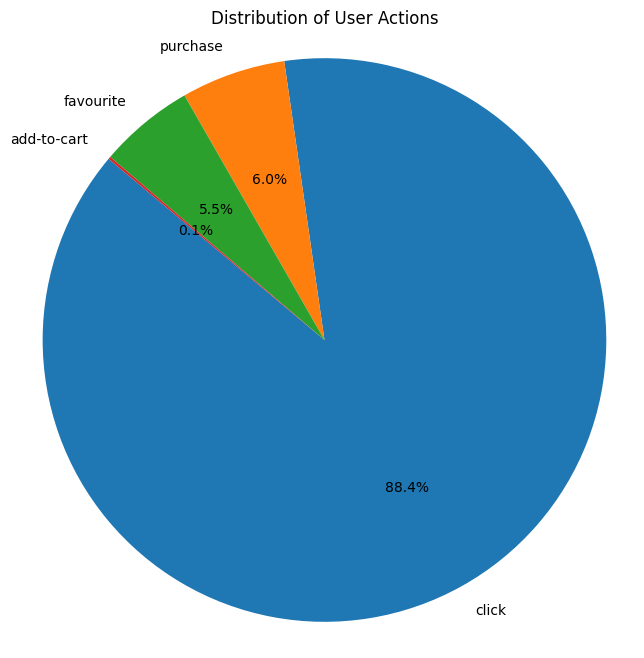

In [23]:
# visualize distribution for action in piechart
import matplotlib.pyplot as plt

action_counts = user_log['action'].value_counts()

# Visualize the distribution of 'action' using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(action_counts, labels=action_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of User Actions')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


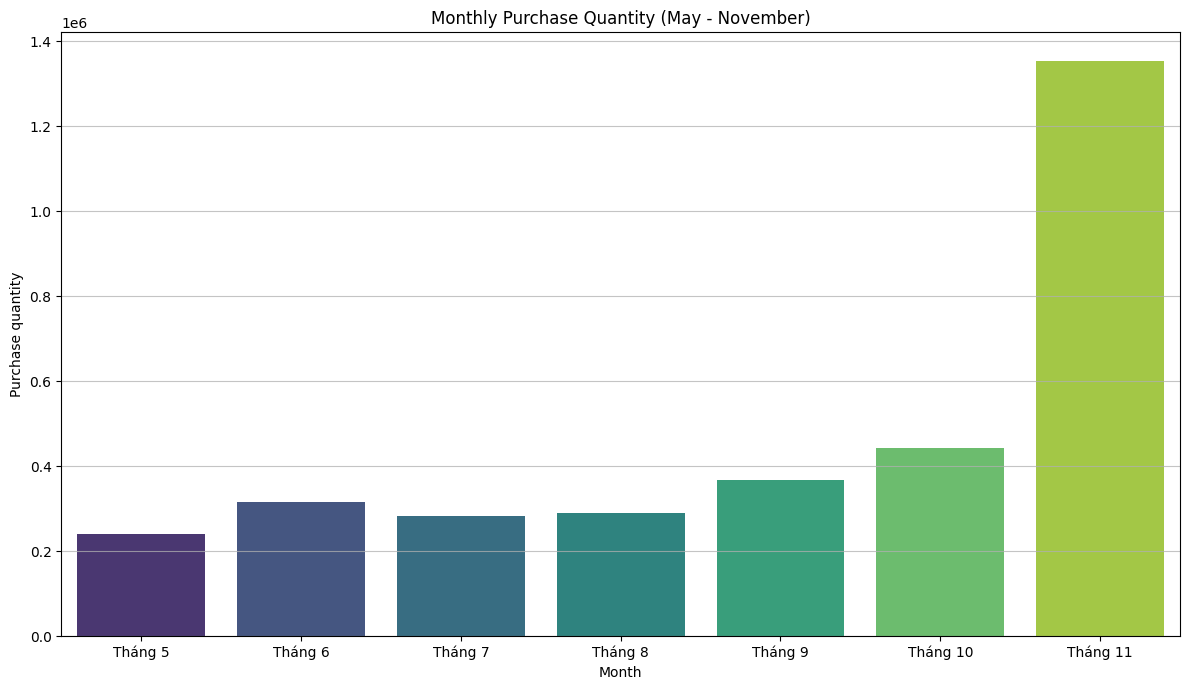

In [24]:
months = [5, 6, 7, 8, 9, 10, 11]

# Filter purchase actions for the desired months
purchase_by_months = user_log[
    (user_log['action'] == 'purchase') &
    (user_log['datetime'].dt.month.isin(months))
].copy()


# Extract month from datetime
purchase_by_months['month'] = purchase_by_months['datetime'].dt.month

# Map month numbers to month names
month_names_full_range = {
    5: 'Tháng 5',
    6: 'Tháng 6',
    7: 'Tháng 7',
    8: 'Tháng 8',
    9: 'Tháng 9',
    10: 'Tháng 10',
    11: 'Tháng 11'
}
purchase_by_months['month_name'] = purchase_by_months['month'].map(month_names_full_range)

# Group by month and count the number of purchases
monthly_purchase_counts_full_range = purchase_by_months.groupby('month_name').size().reset_index(name='purchase_count')

# Define the desired order of months for the plot (May to November)
month_order_full_range = ['Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11']

# Convert 'month_name' to a categorical type with the specified order
# This ensures the months are plotted in chronological order
monthly_purchase_counts_full_range['month_name'] = pd.Categorical(
    monthly_purchase_counts_full_range['month_name'],
    categories=month_order_full_range,
    ordered=True
)

# Sort by the ordered month names
monthly_purchase_counts_full_range = monthly_purchase_counts_full_range.sort_values('month_name')

# Plot the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(data=monthly_purchase_counts_full_range, x='month_name', y='purchase_count', palette='viridis')
plt.title('Monthly Purchase Quantity (May - November)')
plt.xlabel('Month')
plt.ylabel('Purchase quantity')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


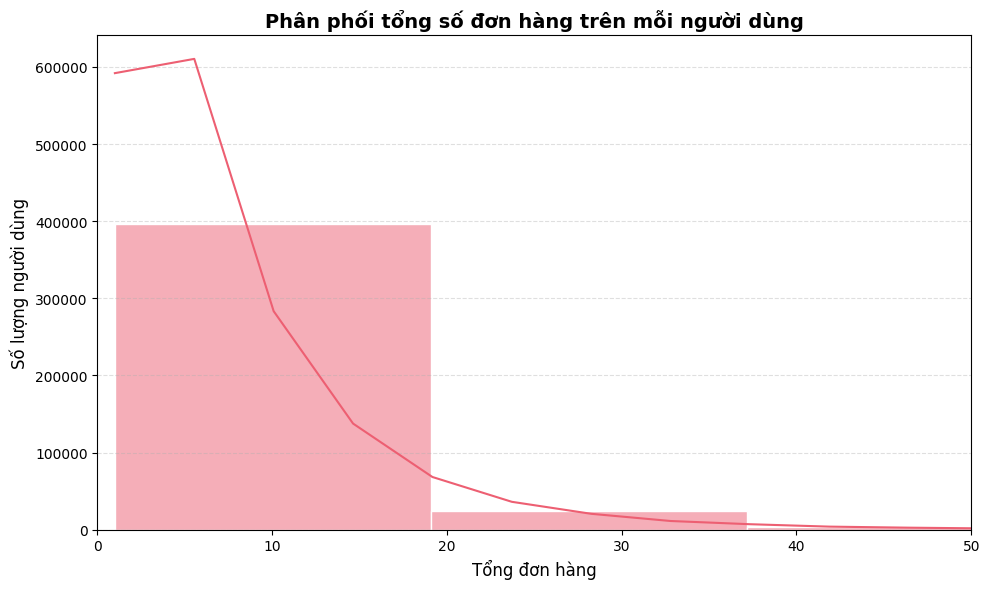

In [25]:
total_purchases = user_log[user_log['action'] == 'purchase'].groupby('user_id').size().reset_index(name='purchase_count')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(
    data=total_purchases['purchase_count'],
    bins=50,
    kde=True,
    color='#ed5f72',
    edgecolor='white'       
)

plt.title('Phân phối tổng số đơn hàng trên mỗi người dùng', fontsize=14, fontweight='bold')
plt.xlabel('Tổng đơn hàng', fontsize=12)
plt.ylabel('Số lượng người dùng', fontsize=12)
plt.xlim(0, 50)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Multivariate

In [26]:
merged_user_data = pd.merge(user_plot_info, user_plot_log, on='user_id', how='left')

print("Merged-table")
print(merged_user_data)

Merged-table
          user_id   age   sex    action    datetime
0          376517  44.0  male     click  2024-10-31
1          376517  44.0  male     click  2024-10-31
2          376517  44.0  male     click  2024-10-31
3          376517  44.0  male     click  2024-10-31
4          376517  44.0  male     click  2024-10-31
...           ...   ...   ...       ...         ...
54925325    18031  26.0  male     click  2024-11-10
54925326    18031  26.0  male     click  2024-11-10
54925327    18031  26.0  male     click  2024-11-10
54925328    18031  26.0  male     click  2024-11-10
54925329    18031  26.0  male  purchase  2024-11-11

[54925330 rows x 5 columns]


/tmp/ipykernel_13/288223284.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_action_counts = merged_user_data.groupby(['age_group', 'action']).size().reset_index(name='count')


<Figure size 1200x600 with 0 Axes>

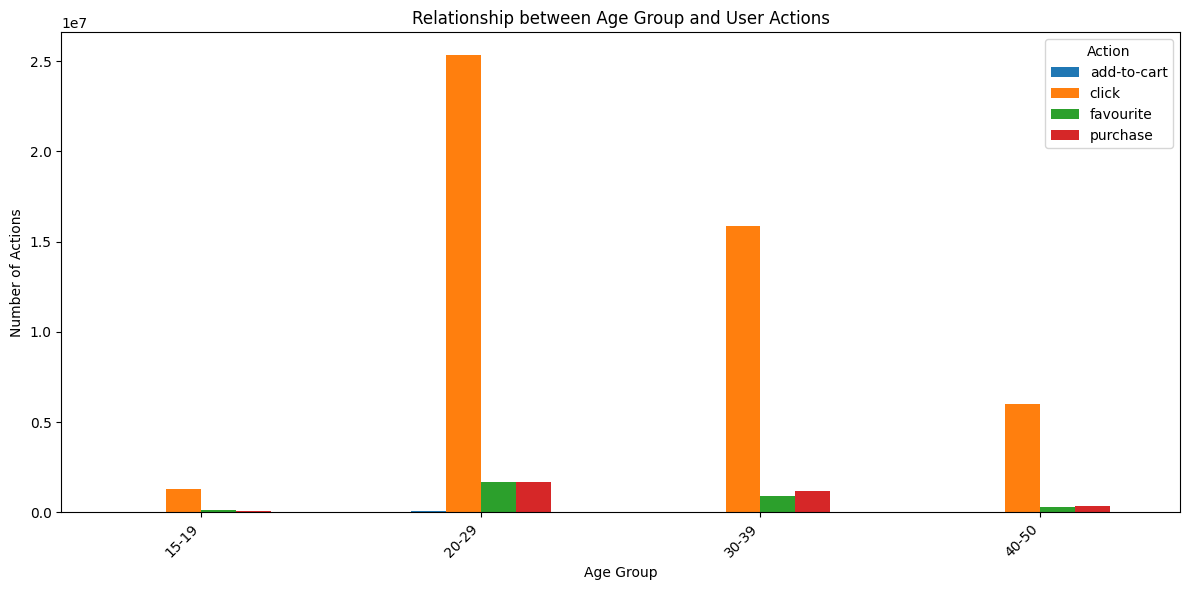

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define age groups
age_bins = [15, 20, 30, 40, 51] # 51 to include ages up to 50
age_labels = ['15-19', '20-29', '30-39', '40-50']

# Create a new column 'age_group' by binning the 'age' column
# Use 'include_lowest=True' to include the lower bound (15) in the first bin
merged_user_data['age_group'] = pd.cut(merged_user_data['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Calculate the count of each action type within each age group
# We can group by 'age_group' and 'action' and then count the occurrences
age_group_action_counts = merged_user_data.groupby(['age_group', 'action']).size().reset_index(name='count')

# Pivot the table to have age groups as index, actions as columns, and counts as values
age_group_action_pivot = age_group_action_counts.pivot(index='age_group', columns='action', values='count').fillna(0)

# Define the order of age groups for plotting
age_group_order = ['15-19', '20-29', '30-39', '40-50']
age_group_action_pivot = age_group_action_pivot.reindex(age_group_order)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
age_group_action_pivot.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Relationship between Age Group and User Actions')
plt.xlabel('Age Group')
plt.ylabel('Number of Actions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Action')
plt.tight_layout()
plt.show()

/tmp/ipykernel_13/2829327562.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  action_counts_by_age_group = filtered_user_data.groupby('age_group')['action'].value_counts().unstack().fillna(0)


<Figure size 1200x700 with 0 Axes>

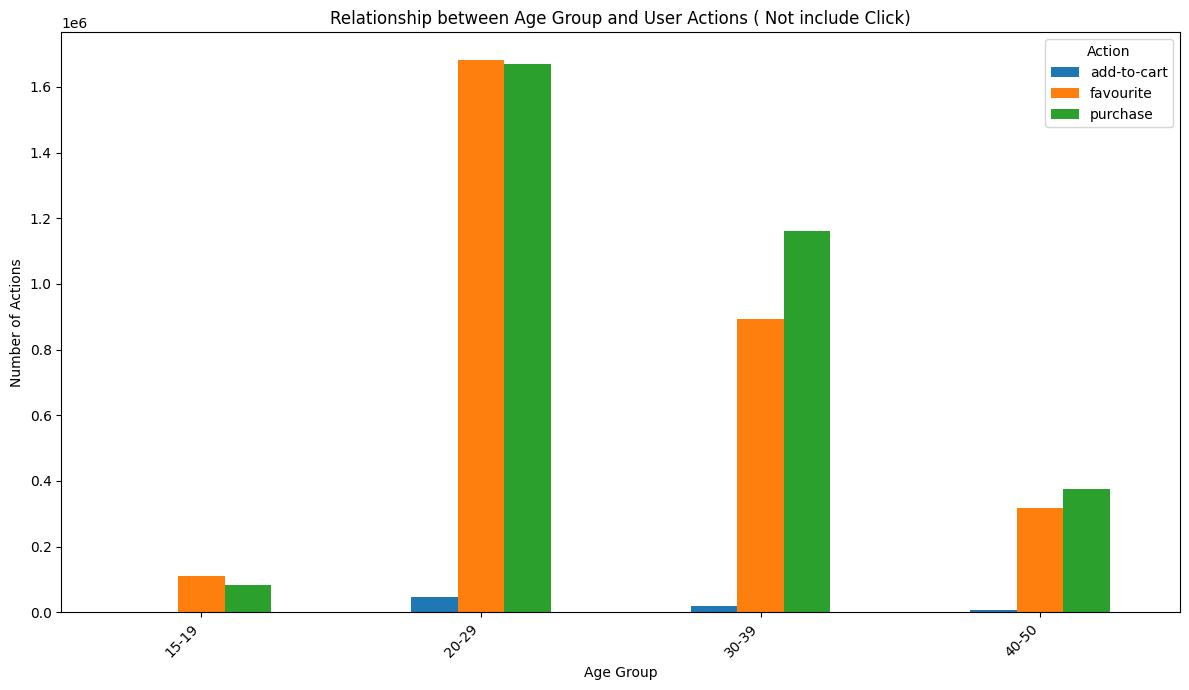

In [28]:
age_bins = [15, 20, 30, 40, 51] # 51 to include ages up to 50
age_labels = ['15-19', '20-29', '30-39', '40-50']

merged_user_data['age_group'] = pd.cut(merged_user_data['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

filtered_user_data = merged_user_data[merged_user_data['action'] != 'click'].copy()

action_counts_by_age_group = filtered_user_data.groupby('age_group')['action'].value_counts().unstack().fillna(0)

age_group_order = ['15-19', '20-29', '30-39', '40-50']
action_counts_by_age_group = action_counts_by_age_group.reindex(age_group_order)

plt.figure(figsize=(12, 7))
action_counts_by_age_group.plot(kind='bar', stacked=False, figsize=(12, 7))

plt.title('Relationship between Age Group and User Actions ( Not include Click)')
plt.xlabel('Age Group')
plt.ylabel('Number of Actions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Action')
plt.tight_layout() 
plt.show()

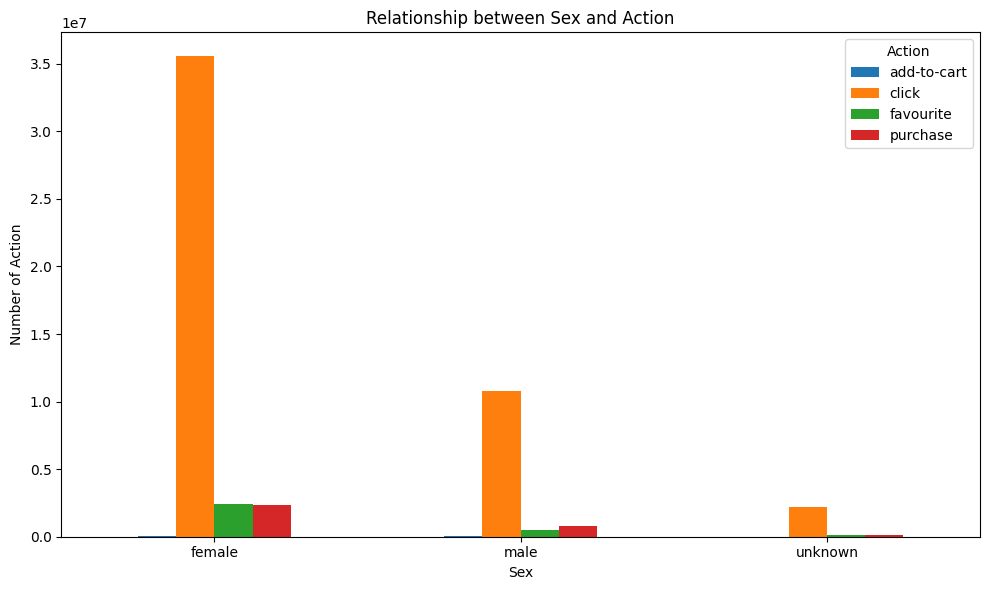

In [29]:

sex_action_counts = merged_user_data.groupby('sex')['action'].value_counts().unstack(fill_value=0)

sex_action_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Relationship between Sex and Action')
plt.xlabel('Sex')
plt.ylabel('Number of Action')
plt.xticks(rotation=0) 
plt.legend(title='Action')
plt.tight_layout() 
plt.show()




<Figure size 1000x600 with 0 Axes>

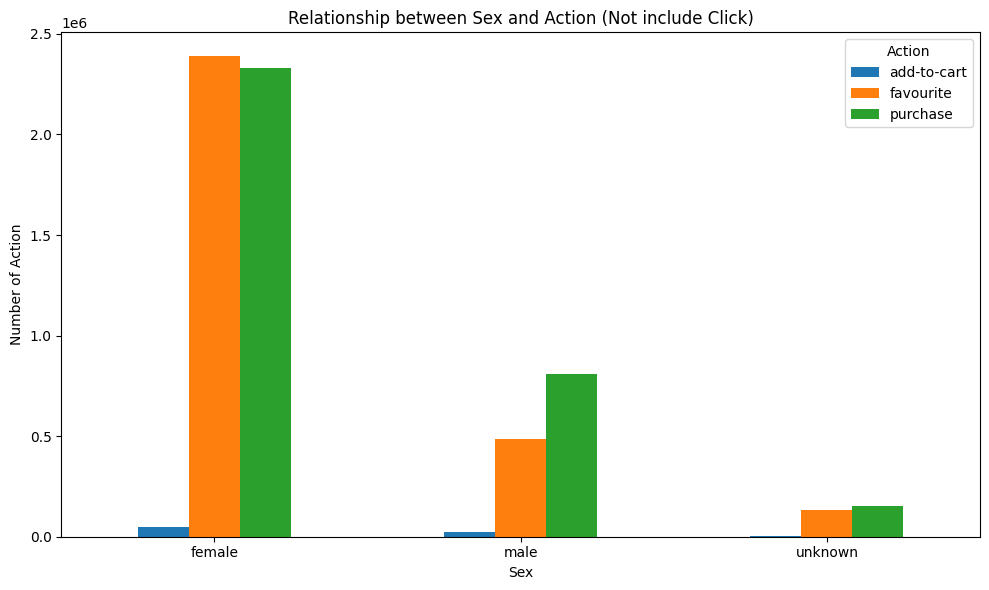

In [30]:
filtered_merged_user_data = merged_user_data[merged_user_data['action'] != 'click'].copy()

sex_action_counts_filtered = filtered_merged_user_data.groupby('sex')['action'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sex_action_counts_filtered.plot(kind='bar', figsize=(10, 6))

plt.title('Relationship between Sex and Action (Not include Click)')
plt.xlabel('Sex')
plt.ylabel('Number of Action')
plt.xticks(rotation=0) 
plt.legend(title='Action')
plt.tight_layout()
plt.show()


# Active users 

In [31]:

import pandas as pd
# Convert 'datetime' column to datetime objects using the observed format
# The format '%Y-%m-%d' seems to match the example value "4-08-29"
try:
    user_log['datetime'] = pd.to_datetime(user_log['datetime'], format='%Y-%m-%d')
except ValueError:
    # If '%Y-%m-%d' doesn't work for all entries, try inferring the format
    # and setting errors='coerce' to turn unparseable dates into NaT (Not a Time)
    print("Warning: '%Y-%m-%d' format failed. Attempting to infer format.")
    user_log['datetime'] = pd.to_datetime(user_log['datetime'], errors='coerce')


# Sort the DataFrame by 'datetime'
user_log_sorted = user_log.sort_values(by='datetime')

# Print the sorted DataFrame
print("User log data sorted by datetime:")
user_log_sorted

User log data sorted by datetime:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,item_id,cat_id,brand_id,merchant_id,action,datetime,sale_day_flag,time_diff
45146566,345958,503231,1577,3103.0,3659,favourite,2024-05-11,0,NaN
12298238,274974,512650,1238,3945.0,144,favourite,2024-05-11,0,NaN
41729871,340031,562140,662,1859.0,461,favourite,2024-05-11,0,0.0
41729890,340031,654034,1505,3978.0,3218,purchase,2024-05-11,0,0.0
41729891,340031,80565,1505,3978.0,3218,purchase,2024-05-11,0,0.0
...,...,...,...,...,...,...,...,...,...
5472573,57028,67897,1349,1360.0,184,click,2024-11-12,0,1.0
47930961,153062,576666,11,4058.0,420,click,2024-11-12,0,1.0
39734741,372823,67897,1349,1360.0,184,click,2024-11-12,0,1.0
11532164,304408,353720,1611,1164.0,375,click,2024-11-12,0,1.0


In [32]:
#!pip install scikit-learn
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define the observation period
start_date = '2024-05-01'
end_date = '2024-11-30'
activity_threshold = '2024-09-01'  # Last 3 months for activity check

print(f"\nObservation Period: {start_date} to {end_date}")
print(f"Activity Threshold: Must have purchased after {activity_threshold}")

# Filter data for the observation period
period_data = user_log_sorted

# First filter users with more than 5 purchases
user_purchase_counts = period_data[period_data['action'] == 'purchase']['user_id'].value_counts()
qualified_users = user_purchase_counts[user_purchase_counts > 5].index
period_data = period_data[period_data['user_id'].isin(qualified_users)]

print(f"Users with >5 purchases: {len(qualified_users):,}")

# Then filter only users who purchased after the activity threshold
recent_purchasers = period_data[
    (period_data['action'] == 'purchase') & 
    (pd.to_datetime(period_data['datetime']) >= pd.to_datetime(activity_threshold))
]['user_id'].unique()

period_data = period_data[period_data['user_id'].isin(recent_purchasers)]

print(f"Users who purchased after {activity_threshold}: {len(recent_purchasers):,}")


print(f"Users with 5+ purchases: {len(qualified_users):,}")
print(f"Total qualified users retained: {period_data['user_id'].nunique():,}")

print(f"\nTotal interactions in period: {len(period_data):,}")



Observation Period: 2024-05-01 to 2024-11-30
Activity Threshold: Must have purchased after 2024-09-01
Users with >5 purchases: 211,785
Users who purchased after 2024-09-01: 211,785
Users with 5+ purchases: 211,785
Total qualified users retained: 211,785

Total interactions in period: 40,565,294


In [33]:
# Optimized version for large datasets
def calculate_user_metrics(period_data):
    # Convert datetime column once at the start
    period_data['datetime'] = pd.to_datetime(period_data['datetime'])
    
    # Pre-calculate purchase data
    purchase_data = period_data[period_data['action'] == 'purchase'].copy()
    
    # Group by user_id and calculate metrics in one go
    user_metrics = period_data.groupby('user_id').agg(
        total_interactions=('action', 'count'),
        total_purchases=('action', lambda x: (x == 'purchase').sum()),
        unique_merchants=('merchant_id', 'nunique')
    ).reset_index()
    
    # Calculate purchase-specific metrics
    purchase_metrics = purchase_data.groupby('user_id').agg(
        last_purchase_date=('datetime', 'max'),
        first_purchase_date=('datetime', 'min'),
        purchase_dates=('datetime', lambda x: sorted(x))
    ).reset_index()
    
    # Merge the metrics
    user_metrics = user_metrics.merge(purchase_metrics, on='user_id', how='left')
    
    # Calculate derived metrics
    user_metrics['is_active'] = user_metrics['last_purchase_date'] >= pd.to_datetime(activity_threshold)
    user_metrics['recency_from_end'] = (pd.to_datetime(end_date) - user_metrics['last_purchase_date']).dt.days
    
    # Calculate weekly purchase frequency
    total_months = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days / 30
    user_metrics['monthly_purchase_frequency'] = user_metrics['total_purchases'] / total_months
    
    # Calculate conversion rate
    user_metrics['conversion_rate'] = user_metrics['total_purchases'] / (user_metrics['total_interactions'] - user_metrics['total_purchases'])
    user_metrics['conversion_rate'] = user_metrics['conversion_rate'].fillna(0)
    
    # Calculate unique merchant rate
    user_metrics['unique_merchant_rate'] = user_metrics['unique_merchants'] / user_metrics['total_purchases']
    user_metrics['unique_merchant_rate'] = user_metrics['unique_merchant_rate'].fillna(0)
    
    # Calculate standard deviation of inter-purchase times
    def calculate_std_inter_purchase(dates):
        if len(dates) <= 1:
            return 0
        dates = sorted(dates)
        inter_purchase_days = pd.Series(dates).diff().dt.days.dropna()
        return inter_purchase_days.std() if len(inter_purchase_days) > 1 else 0
    
    user_metrics['std_inter_purchase'] = user_metrics['purchase_dates'].apply(calculate_std_inter_purchase)
    
 
    
    return user_metrics

# Usage:
user_metrics = calculate_user_metrics(period_data)

In [34]:
print("User metrics calculated successfully")
user_metrics.head()

User metrics calculated successfully


,user_id,total_interactions,total_purchases,unique_merchants,last_purchase_date,first_purchase_date,purchase_dates,is_active,recency_from_end,monthly_purchase_frequency,conversion_rate,unique_merchant_rate,std_inter_purchase
0,1,33,6,9,2024-11-11,2024-10-11,"[2024-10-11 00:00:00, 2024-10-21 00:00:00, 202...",True,19,0.845070,0.222222,1.500000,9.338094
1,2,63,14,14,2024-11-11,2024-06-26,"[2024-06-26 00:00:00, 2024-06-26 00:00:00, 202...",True,19,1.971831,0.285714,1.000000,17.863083
2,5,173,13,56,2024-11-11,2024-05-20,"[2024-05-20 00:00:00, 2024-05-20 00:00:00, 202...",True,19,1.830986,0.081250,4.307692,20.681385
3,6,249,17,79,2024-11-11,2024-06-08,"[2024-06-08 00:00:00, 2024-06-08 00:00:00, 202...",True,19,2.394366,0.073276,4.647059,11.755850
4,7,14,8,6,2024-11-11,2024-11-10,"[2024-11-10 00:00:00, 2024-11-11 00:00:00, 202...",True,19,1.126761,1.333333,0.750000,0.377964


In [35]:
user_metrics.tail()

,user_id,total_interactions,total_purchases,unique_merchants,last_purchase_date,first_purchase_date,purchase_dates,is_active,recency_from_end,monthly_purchase_frequency,conversion_rate,unique_merchant_rate,std_inter_purchase
211780,424163,140,6,35,2024-11-11,2024-05-15,"[2024-05-15 00:00:00, 2024-05-15 00:00:00, 202...",True,19,0.845070,0.044776,5.833333,62.789330
211781,424166,90,11,22,2024-11-11,2024-05-14,"[2024-05-14 00:00:00, 2024-05-24 00:00:00, 202...",True,19,1.549296,0.139241,2.000000,27.274123
211782,424167,35,6,12,2024-11-11,2024-05-29,"[2024-05-29 00:00:00, 2024-10-21 00:00:00, 202...",True,19,0.845070,0.206897,2.000000,62.814807
211783,424168,223,6,112,2024-11-11,2024-08-11,"[2024-08-11 00:00:00, 2024-08-11 00:00:00, 202...",True,19,0.845070,0.027650,18.666667,21.835751
211784,424169,297,17,102,2024-11-11,2024-05-11,"[2024-05-11 00:00:00, 2024-05-12 00:00:00, 202...",True,19,2.394366,0.060714,6.000000,23.053561


In [36]:
print(user_metrics.shape)
print("\nStatistics for std_inter_purchase:")
print(f"Mean: {user_metrics['std_inter_purchase'].mean():.2f}")
print(f"Median: {user_metrics['std_inter_purchase'].median():.2f}")
print(f"Standard deviation: {user_metrics['std_inter_purchase'].std():.2f}")
print(f"Min: {user_metrics['std_inter_purchase'].min():.2f}")
print(f"Max: {user_metrics['std_inter_purchase'].max():.2f}")
print(f"25th percentile: {user_metrics['std_inter_purchase'].quantile(0.25):.2f}")
print(f"75th percentile: {user_metrics['std_inter_purchase'].quantile(0.75):.2f}")
print(f"Number of null values: {user_metrics['std_inter_purchase'].isnull().sum()}")
print(f"Number of zero values: {(user_metrics['std_inter_purchase'] == 0).sum()}")



(211785, 13)

Statistics for std_inter_purchase:
Mean: 24.41
Median: 21.84
Standard deviation: 14.55
Min: 0.00
Max: 82.29
25th percentile: 13.98
75th percentile: 32.40
Number of null values: 0
Number of zero values: 5596


In [37]:
# Convert to DataFrame
loyalty_df = pd.DataFrame(user_metrics)

print(f"\nTotal users with purchases in period: {len(loyalty_df):,}")


Total users with purchases in period: 211,785


In [38]:

# Step 1: Filter for Active Customers
active_customers = loyalty_df[loyalty_df['is_active'] == True].copy()
inactive_customers = loyalty_df[loyalty_df['is_active'] == False].copy()

print(f"\nSTEP 1 - ACTIVITY FILTER:")
print(f"Active customers (purchased after {activity_threshold}): {len(active_customers):,}")
print(f"Inactive customers (last purchase before {activity_threshold}): {len(inactive_customers):,}")
print(f"Activity rate: {len(active_customers)/len(loyalty_df)*100:.1f}%")


STEP 1 - ACTIVITY FILTER:
Active customers (purchased after 2024-09-01): 211,785
Inactive customers (last purchase before 2024-09-01): 0
Activity rate: 100.0%


Unique values in recency_from_end:
Min recency: 19
Max recency: 19
Number of unique values: 1
Unique values: [19]

Recency distribution:


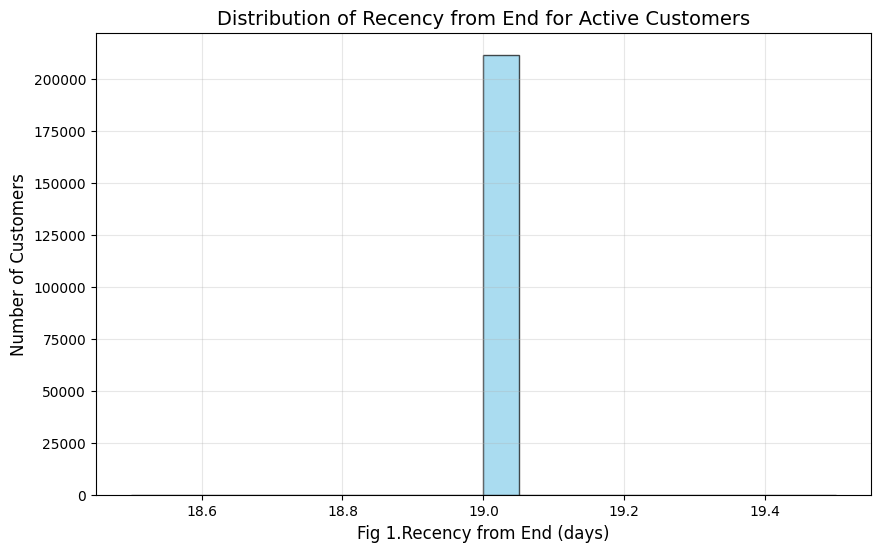

recency_from_end
19    211785
Name: count, dtype: int64


In [39]:
# Find unique values in recency_from_end
print("Unique values in recency_from_end:")
print(f"Min recency: {active_customers['recency_from_end'].min()}")
print(f"Max recency: {active_customers['recency_from_end'].max()}")
print(f"Number of unique values: {active_customers['recency_from_end'].nunique()}")
print(f"Unique values: {sorted(active_customers['recency_from_end'].unique())}")

# Check distribution
print("\nRecency distribution:")
plt.figure(figsize=(10, 6))
plt.hist(active_customers['recency_from_end'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Fig 1.Recency from End (days)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Distribution of Recency from End for Active Customers', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()
print(active_customers['recency_from_end'].value_counts().sort_index())


FREQUENCY ANALYSIS:
Monthly Purchase Frequency Statistics:
MEAN: 1.7691
MEDIAN: 1.4085
STD: 1.2414
MIN: 0.8451
MAX: 127.4648
Q25: 0.9859
Q75: 2.1127

Frequency Category Distribution:
Medium (1-2/month): 99,177 customers (46.8%)
Low (< 1/month): 57,569 customers (27.2%)
High (2-5/month): 50,440 customers (23.8%)
Very High (5+/month): 4,599 customers (2.2%)


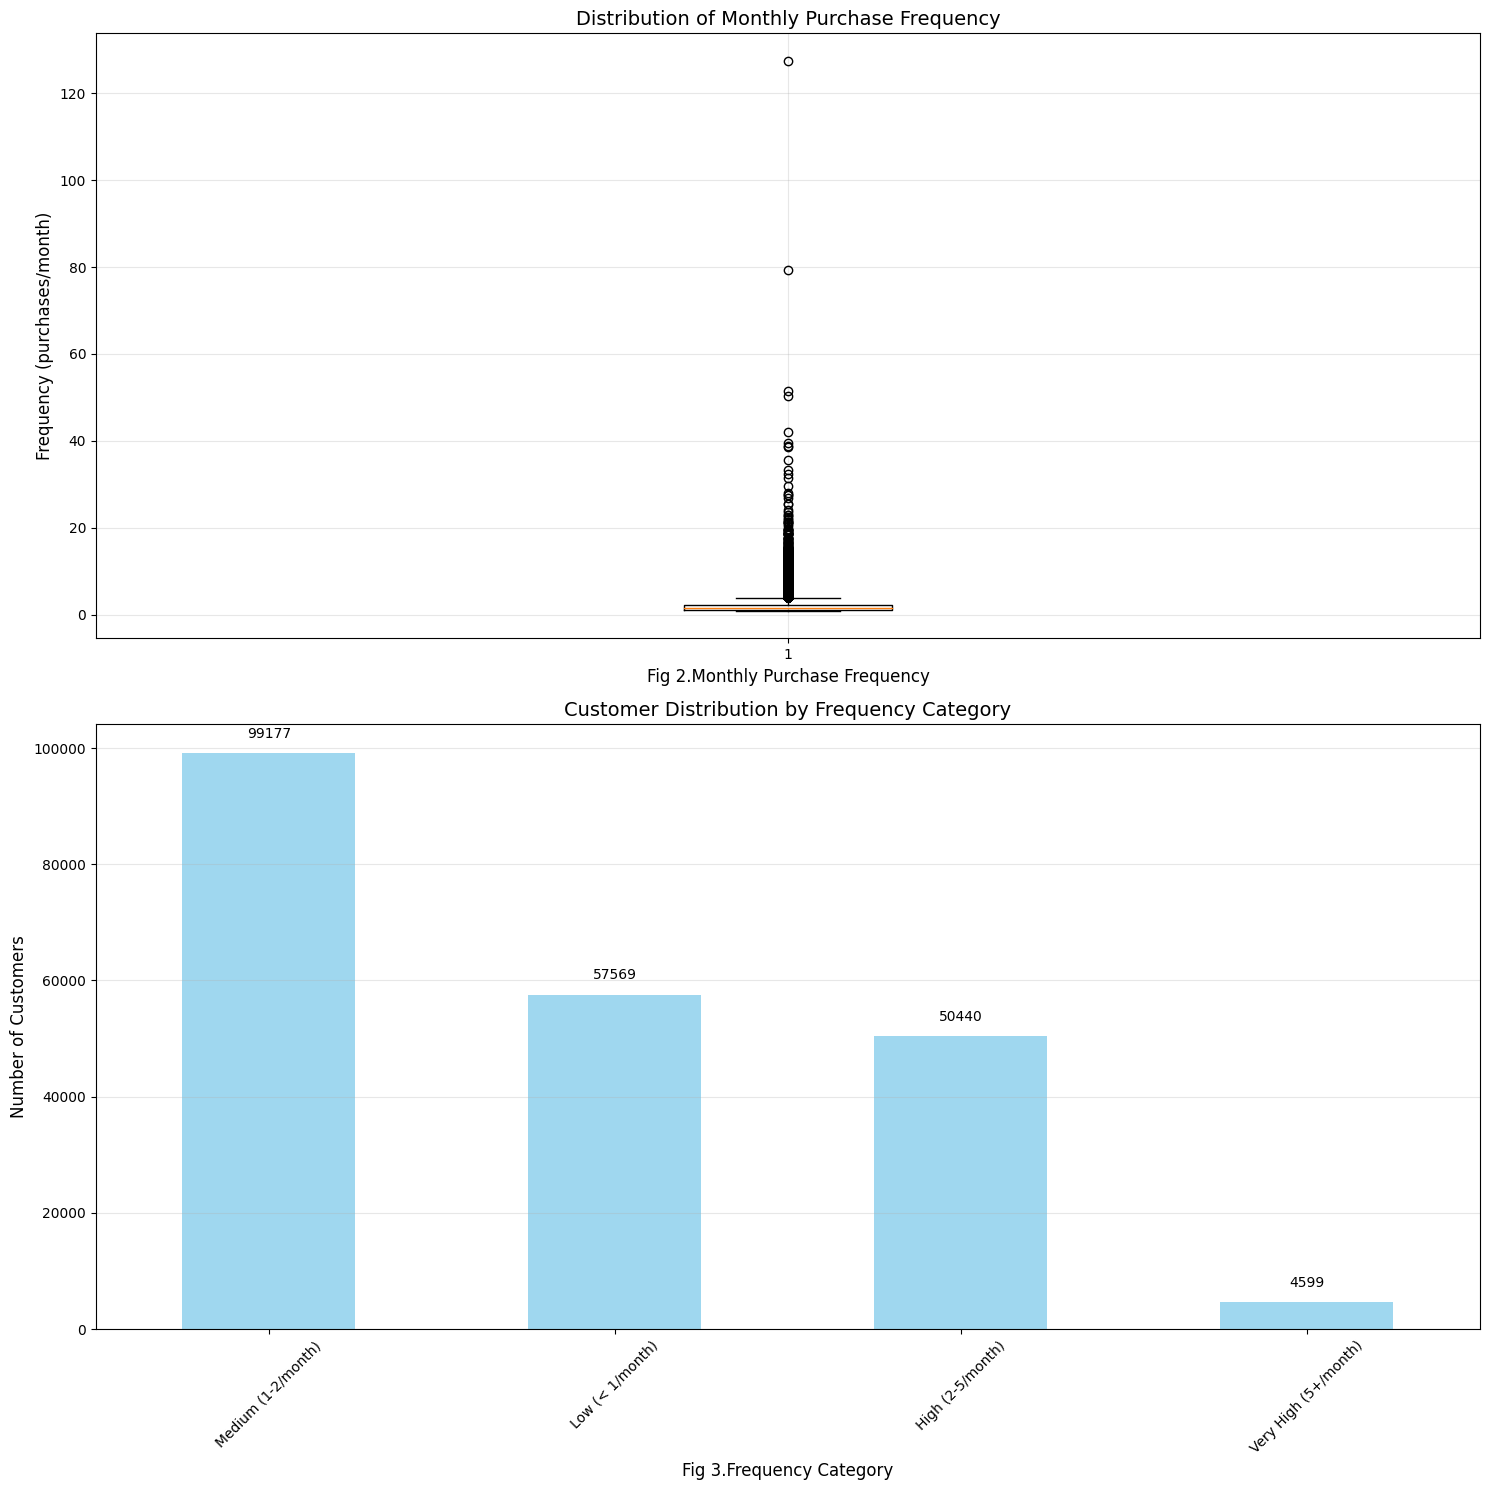

In [40]:
# Calculate frequency statistics for active customers
print("FREQUENCY ANALYSIS:")
print("=" * 50)

# Calculate frequency statistics
frequency_stats = {
    'mean': active_customers['monthly_purchase_frequency'].mean(),
    'median': active_customers['monthly_purchase_frequency'].median(),
    'std': active_customers['monthly_purchase_frequency'].std(),
    'min': active_customers['monthly_purchase_frequency'].min(),
    'max': active_customers['monthly_purchase_frequency'].max(),
    'q25': active_customers['monthly_purchase_frequency'].quantile(0.25),
    'q75': active_customers['monthly_purchase_frequency'].quantile(0.75)
}

print("Monthly Purchase Frequency Statistics:")
for stat, value in frequency_stats.items():
    print(f"{stat.upper()}: {value:.4f}")

# Calculate frequency categories
def categorize_frequency(freq):
    if freq < 1:
        return 'Low (< 1/month)'
    elif freq < 2:
        return 'Medium (1-2/month)'
    elif freq < 5:
        return 'High (2-5/month)'
    else:
        return 'Very High (5+/month)'

active_customers['frequency_category'] = active_customers['monthly_purchase_frequency'].apply(categorize_frequency)

print("\nFrequency Category Distribution:")
freq_dist = active_customers['frequency_category'].value_counts()
for category, count in freq_dist.items():
    print(f"{category}: {count:,} customers ({count/len(active_customers)*100:.1f}%)")

# Create visualizations for frequency analysis
fig, axes = plt.subplots(2, 1, figsize=(15, 15))


# 1. Frequency distribution boxplot
axes[0].boxplot(active_customers['monthly_purchase_frequency'])
axes[0].set_xlabel('Fig 2.Monthly Purchase Frequency', fontsize=12)
axes[0].set_ylabel('Frequency (purchases/month)', fontsize=12)
axes[0].set_title('Distribution of Monthly Purchase Frequency', fontsize=14)
axes[0].grid(True, alpha=0.3)


# 2. Frequency category bar chart
freq_dist.plot(kind='bar', ax=axes[1], color='skyblue', alpha=0.8)
axes[1].set_xlabel('Fig 3.Frequency Category', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Customer Distribution by Frequency Category', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(freq_dist.values):
    axes[1].text(i, v + len(active_customers)*0.01, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




Unique Merchant Rate Statistics:
count    211785.000000
mean          4.015891
std           3.297939
min           0.084034
25%           1.933333
50%           3.117647
75%           5.000000
max         109.857143
Name: unique_merchant_rate, dtype: float64


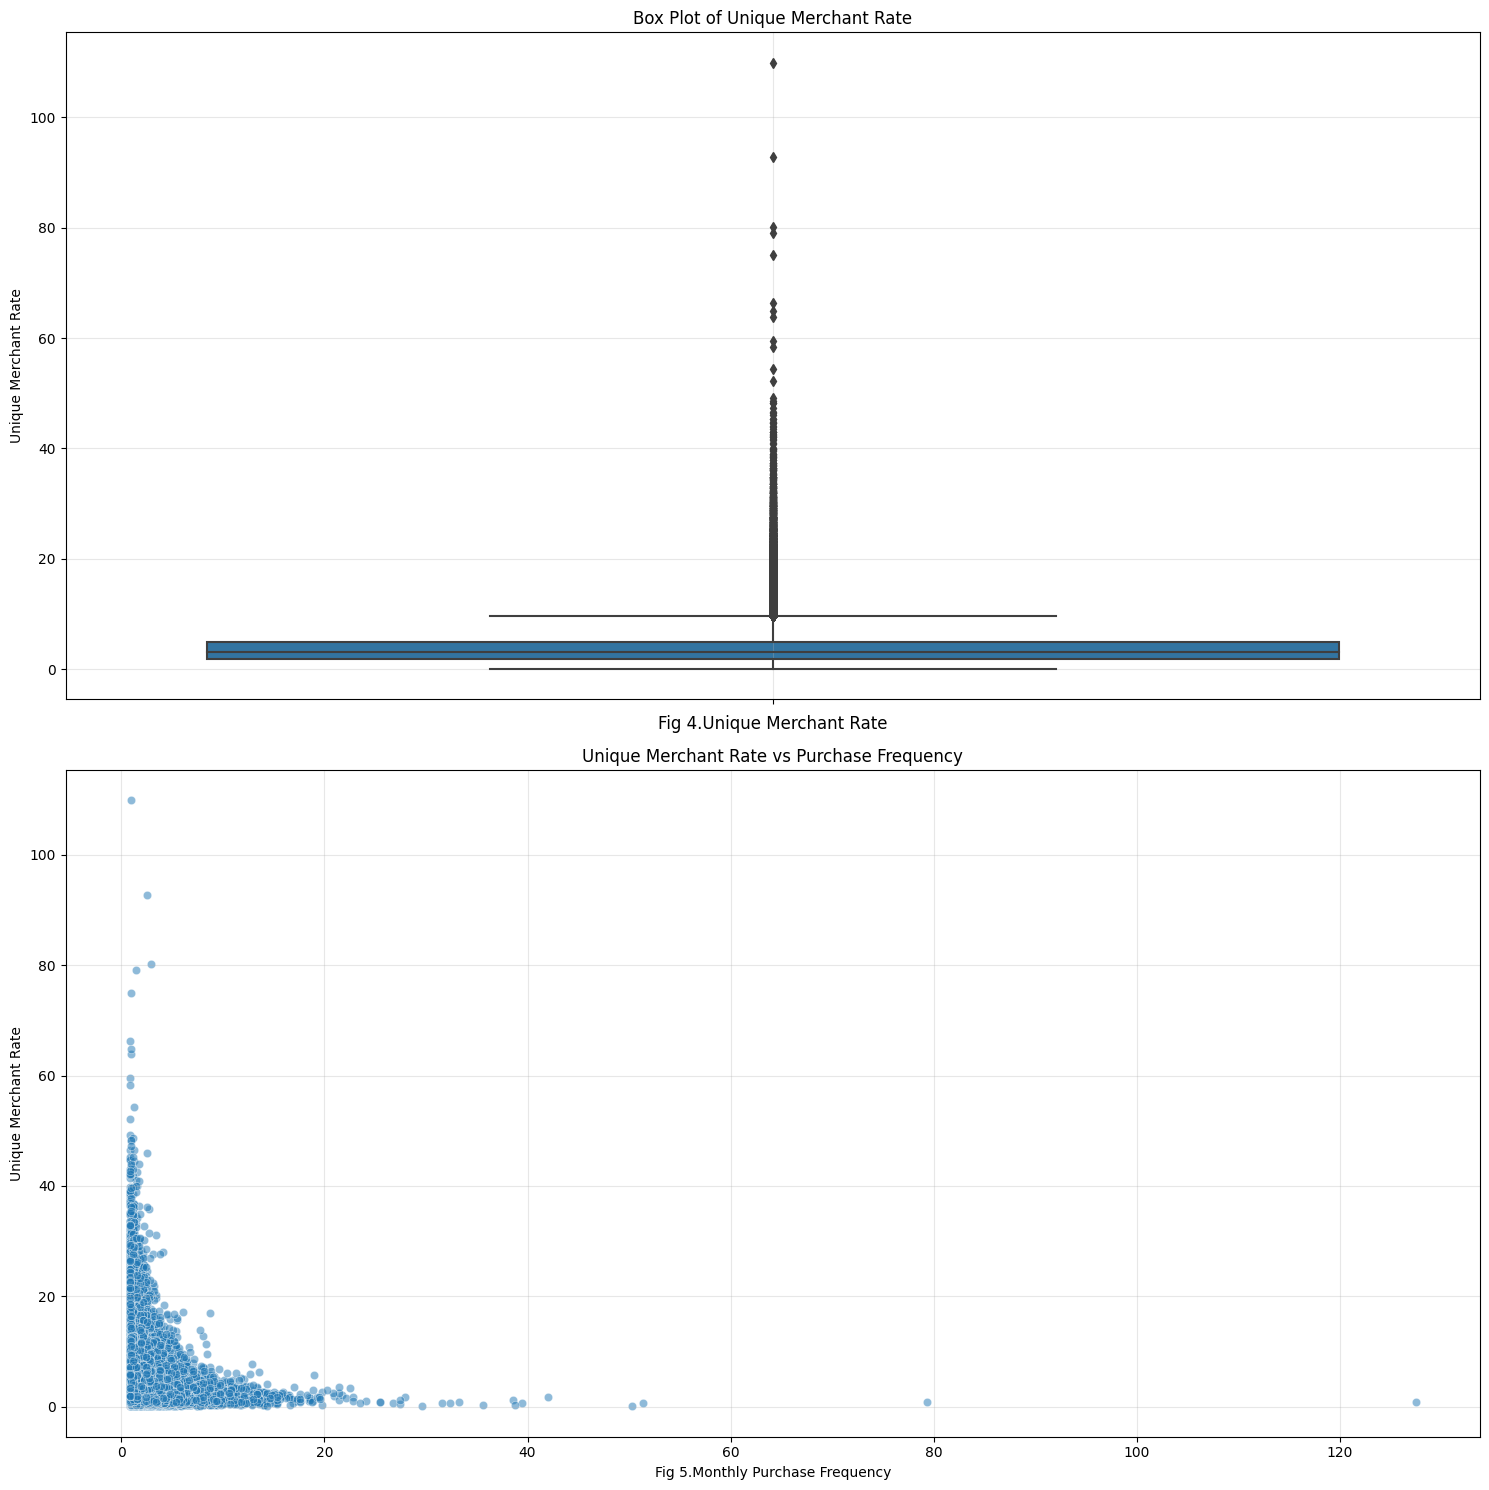


Correlations with Unique Merchant Rate:
monthly_purchase_frequency   -0.173857
total_purchases              -0.173857
conversion_rate              -0.288041
Name: unique_merchant_rate, dtype: float64

Distribution of Unique Merchant Rate Ranges:
0-1: 12,725 customers (6.0%)
1-3: 90,928 customers (42.9%)
3-5: 55,850 customers (26.4%)
5-10: 41,735 customers (19.7%)
10+: 10,547 customers (5.0%)


In [41]:
# Calculate unique merchant rate statistics
print("\nUnique Merchant Rate Statistics:")
print("=" * 50)
print(active_customers['unique_merchant_rate'].describe())

# Create visualizations for unique merchant rate analysis
fig, axes = plt.subplots(2,1, figsize=(15, 15))


# 2. Box plot
sns.boxplot(data=active_customers, y='unique_merchant_rate', ax=axes[0])
axes[0].set_title('Box Plot of Unique Merchant Rate', fontsize=12)
axes[0].set_xlabel('Fig 4.Unique Merchant Rate', fontsize=12)
axes[0].set_ylabel('Unique Merchant Rate', fontsize=10)
axes[0].grid(True, alpha=0.3)

# 3. Scatter plot with purchase frequency
sns.scatterplot(data=active_customers, x='monthly_purchase_frequency', 
                y='unique_merchant_rate', alpha=0.5, ax=axes[1])
axes[1].set_title('Unique Merchant Rate vs Purchase Frequency', fontsize=12)
axes[1].set_xlabel('Fig 5.Monthly Purchase Frequency', fontsize=10)
axes[1].set_ylabel('Unique Merchant Rate', fontsize=10)
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# Calculate correlation between unique merchant rate and other metrics
correlation_metrics = ['monthly_purchase_frequency', 'total_purchases', 'conversion_rate']
correlations = active_customers[['unique_merchant_rate'] + correlation_metrics].corr()['unique_merchant_rate']
print("\nCorrelations with Unique Merchant Rate:")
print("=" * 50)
print(correlations.drop('unique_merchant_rate'))

# Calculate percentage of customers in different merchant rate ranges
rate_ranges = [(0, 1), (1, 3), (3, 5), (5, 10), (10, float('inf'))]
rate_labels = ['0-1', '1-3', '3-5', '5-10', '10+']

active_customers['merchant_rate_range'] = pd.cut(active_customers['unique_merchant_rate'], 
                                               bins=[r[0] for r in rate_ranges] + [float('inf')],
                                               labels=rate_labels)

rate_distribution = active_customers['merchant_rate_range'].value_counts().sort_index()
print("\nDistribution of Unique Merchant Rate Ranges:")
print("=" * 50)
for range_label, count in rate_distribution.items():
    percentage = (count / len(active_customers)) * 100
    print(f"{range_label}: {count:,} customers ({percentage:.1f}%)")



Standard Deviation of Inter-Purchase Time Statistics:
count    211785.000000
mean         24.411504
std          14.550321
min           0.000000
25%          13.977164
50%          21.835927
75%          32.395620
max          82.287302
Name: std_inter_purchase, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


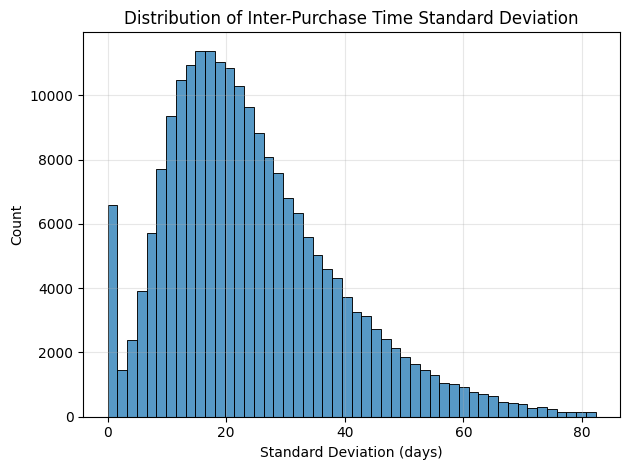


Distribution of Inter-Purchase Time Standard Deviation Ranges:
0-5 days: 4,923 customers (2.3%)
5-10 days: 17,847 customers (8.4%)
10-20 days: 65,589 customers (31.0%)
20-30 days: 55,307 customers (26.1%)
30+ days: 62,523 customers (29.5%)


In [42]:
# Calculate statistics for std_inter_purchase
print("\nStandard Deviation of Inter-Purchase Time Statistics:")
print("=" * 50)
print(active_customers['std_inter_purchase'].describe())

# Create visualizations for std_inter_purchase analysis

# 1. Histogram
sns.histplot(data=active_customers, x='std_inter_purchase', bins=50)
plt.title('Distribution of Inter-Purchase Time Standard Deviation', fontsize=12)
plt.xlabel('Standard Deviation (days)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate percentage of customers in different std ranges
std_ranges = [(0, 5), (5, 10), (10, 20), (20, 30), (30, float('inf'))]
std_labels = ['0-5', '5-10', '10-20', '20-30', '30+']

active_customers['std_range'] = pd.cut(active_customers['std_inter_purchase'], 
                                     bins=[r[0] for r in std_ranges] + [float('inf')],
                                     labels=std_labels)

std_distribution = active_customers['std_range'].value_counts().sort_index()
print("\nDistribution of Inter-Purchase Time Standard Deviation Ranges:")
print("=" * 50)
for range_label, count in std_distribution.items():
    percentage = (count / len(active_customers)) * 100
    print(f"{range_label} days: {count:,} customers ({percentage:.1f}%)")


# Loyal customers (2.2)

--- DataFrame 'purchases' after preparation (5-11) ---
          user_id    action   datetime  month  day
23288888        1  purchase 2024-10-11     10   11
23288867        1  purchase 2024-10-21     10   21
23288874        1  purchase 2024-11-11     11   11
23288875        1  purchase 2024-11-11     11   11
23288876        1  purchase 2024-11-11     11   11




/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


--- Average IPT results per customer and filtered ---
   user_id  average_ipt_days
0        1          6.200000
1        2         10.615385
2        3         59.666667
3        4               NaN
4        5         14.583333

Number of customers satisfying IPT <= 15 days: 190528
--- Average Frequency per month and filtered ---
   user_id  total_purchases  monthly_avg_frequency
0        1                6               0.857143
1        2               14               2.000000
2        3                4               0.571429
3        4                1               0.142857
4        5               13               1.857143

Number of customers satisfying Frequency >= 2 purchases/month: 97567
--- Recency results for each customer and filter ---
   user_id  Recency
0        1        1
1        2        1
2        3        1
3        4        1
4        5        1

Number of customers that satisfy Recency <= 20 days: 424170
--- Sales Ratio results for each customer and filtered by 

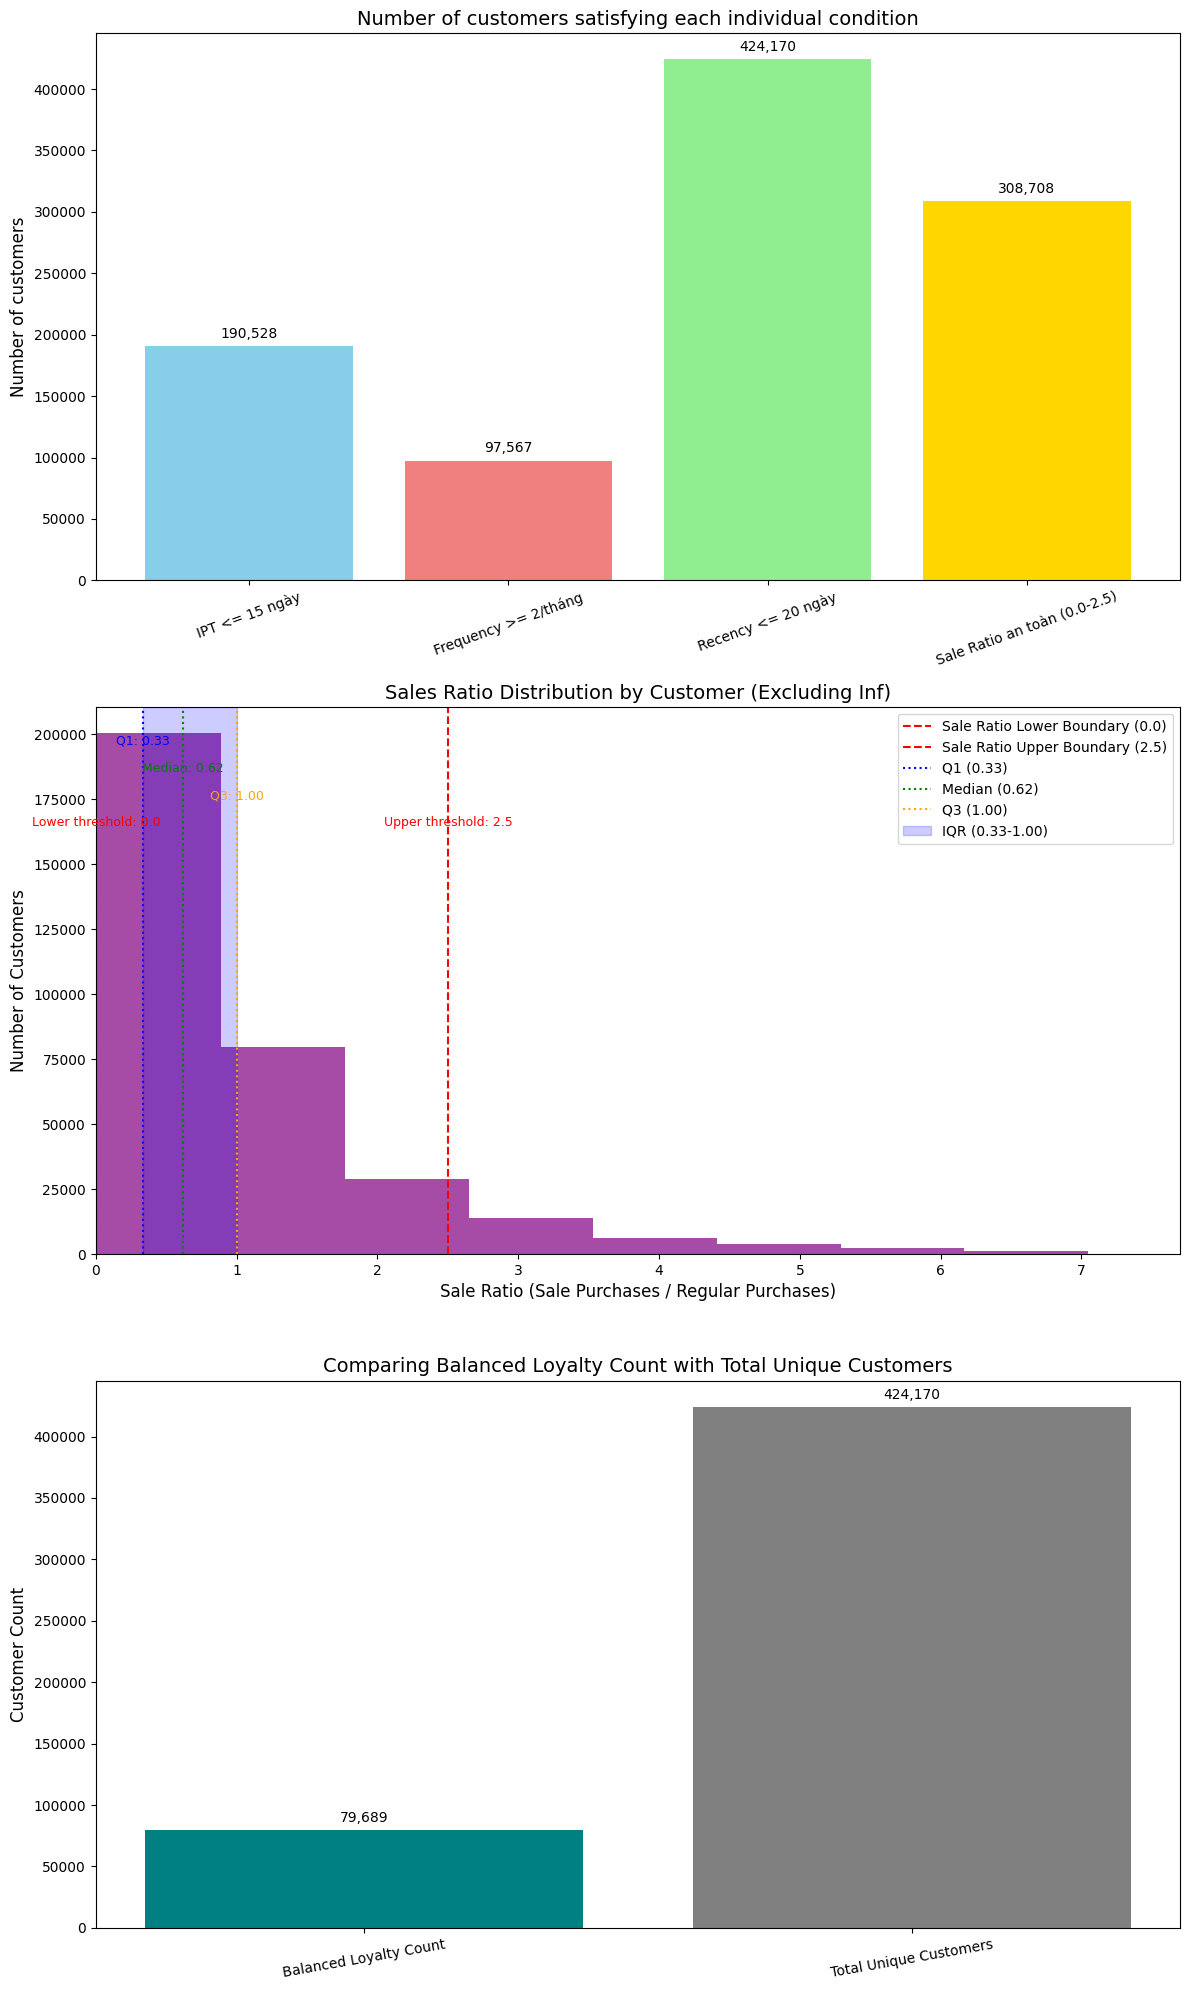

--- DataFrame 'loyal_users_df' (from the loyal customer list) ---
   user_id
0   262144
1        2
2   262147
3        5
4        6


--- DEMOGRAPHIC INFORMATION OF BALANCED LOYAL CUSTOMERS ---
   user_id   age     sex                   job marital_status
0   262144  47.0  female       Project Manager         Single
1        2  26.0  female  Nhà tư vấn tài chính        Married
2   262147  28.0  female     Kỹ sư nông nghiệp        Married
3        5  37.0  female  Nhân viên hành chính         Single
4        6  31.0  female               unknown        Married

Total number of loyal customers with demographic information: 79689

--- Gender statistics of loyal customers ---
sex
female     58784
male       16792
unknown     4113
Name: count, dtype: int64

--- Age group statistics of loyal customers ---
age_group
15-19     1396
20-29    36277
30-39    32307
Name: count, dtype: int64

--- Loyal customer marital status statistics ---
marital_status
Married     46343
Single      25279
Divorce

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


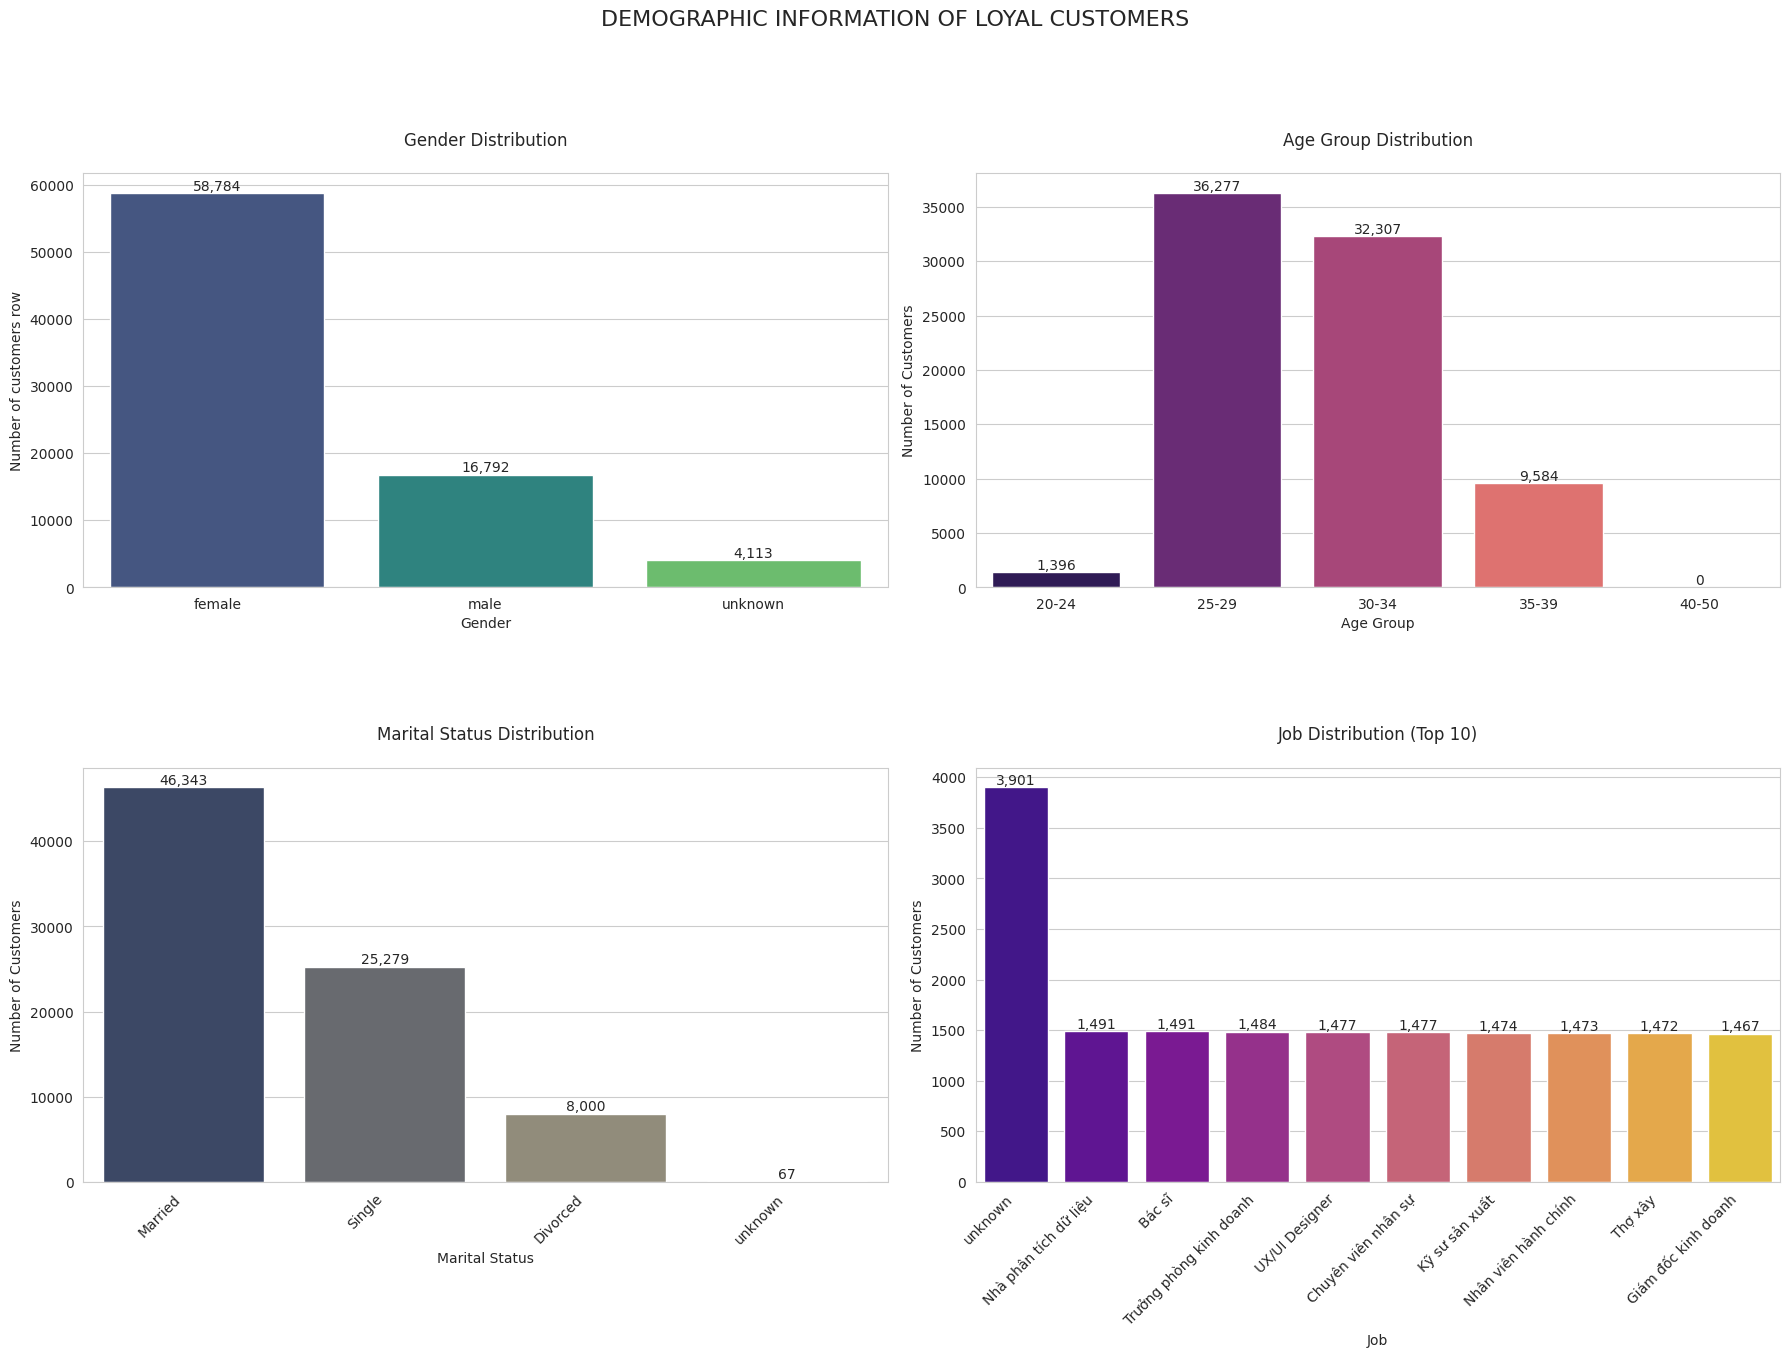


--- K-MEANS CLUSTERING FOR LOYAL CUSTOMERS ---
--- Prepared data for K-means (top 5 rows) ---
   average_ipt_days  monthly_avg_frequency  Recency  sale_ratio
0         11.600000               1.571429        1    0.375000
1         10.615385               2.000000        1    1.800000
2         14.700000               1.571429        1    0.375000
3         14.583333               1.857143        1    0.300000
4          9.750000               2.428571        1    0.214286

Number of customers to be clustered: 79689
Check for NaNs after processing: 0

--- Standardized data (top 5 rows) ---
   average_ipt_days  monthly_avg_frequency  Recency  sale_ratio
0          0.732870              -0.789199      0.0   -0.293121
1          0.431189              -0.512898      0.0    2.674174
2          1.682694              -0.789199      0.0   -0.293121
3          1.646948              -0.604998      0.0   -0.449295
4          0.166040              -0.236598      0.0   -0.627779


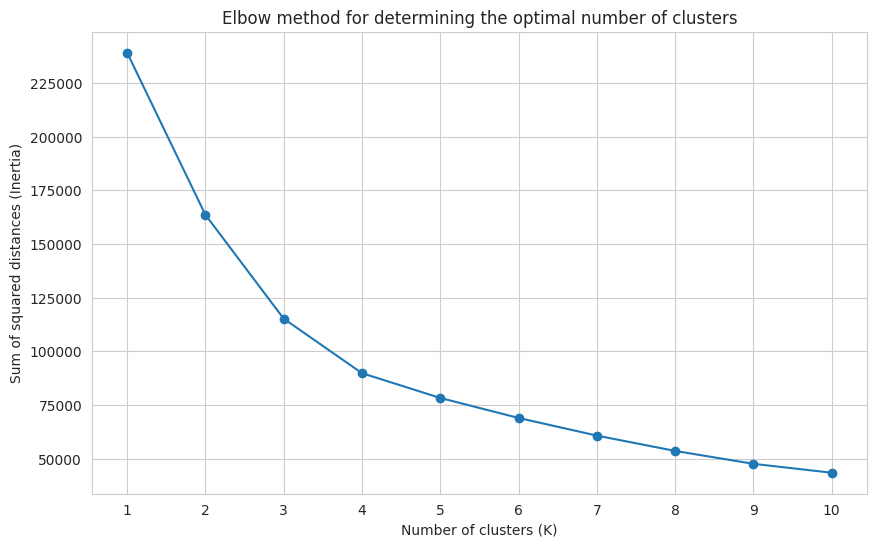


--- Please view the Elbow plot and choose the appropriate number of clusters (K). ---
The 'elbow' point (elbow) is where the curve starts to flatten, indicating that adding more clusters does not provide much improvement.

--- K-means clustering with K = 3 is complete. ---
Number of customers in each cluster:
cluster
0    41760
1    26141
2    11788
Name: count, dtype: int64

--- Average characteristics of loyal customer clusters ---
         average_ipt_days  monthly_avg_frequency  Recency  sale_ratio
cluster                                                              
0               11.354013               2.155450      1.0    0.358085
1                5.841604               4.022297      1.0    0.341635
2                9.071442               2.342806      1.0    1.460524

--- Normalized average characteristics of loyal customer clusters ---
         average_ipt_days  monthly_avg_frequency  Recency  sale_ratio
cluster                                                              


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


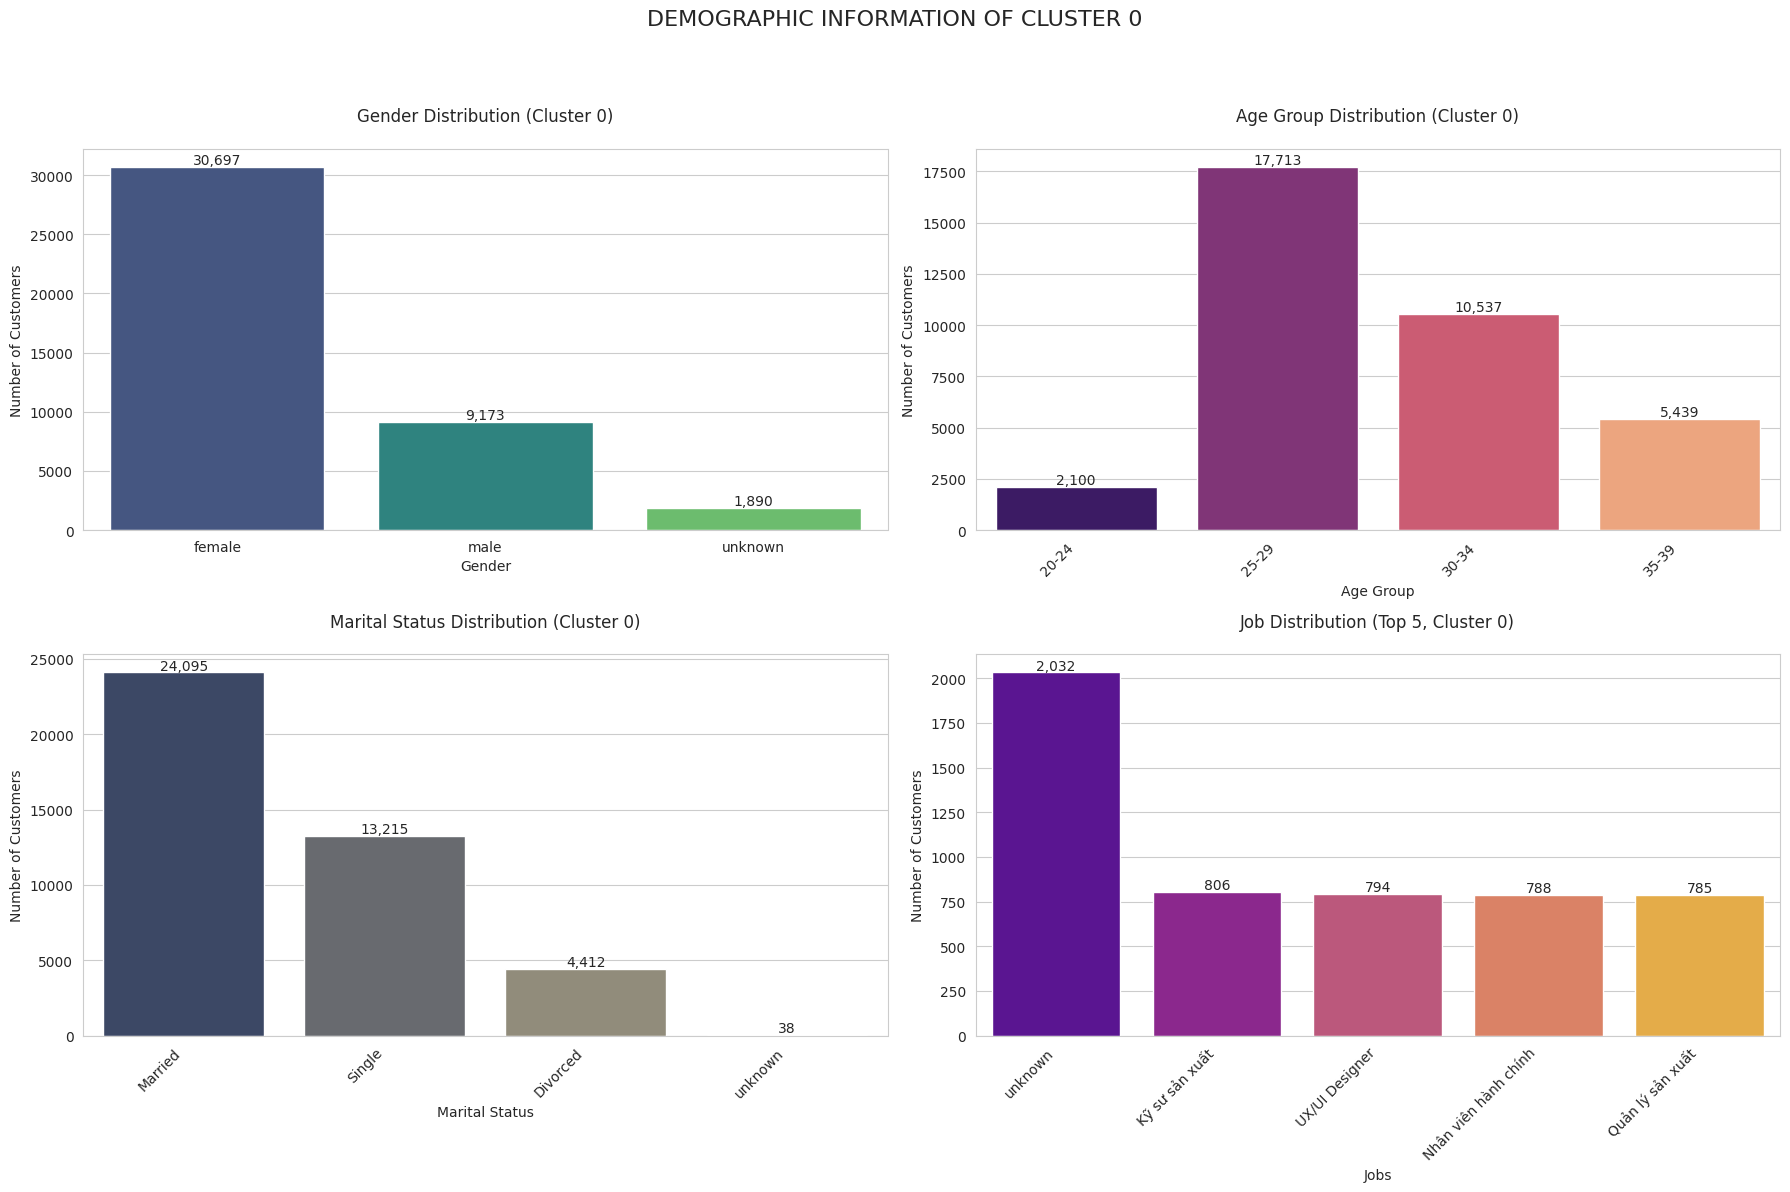

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


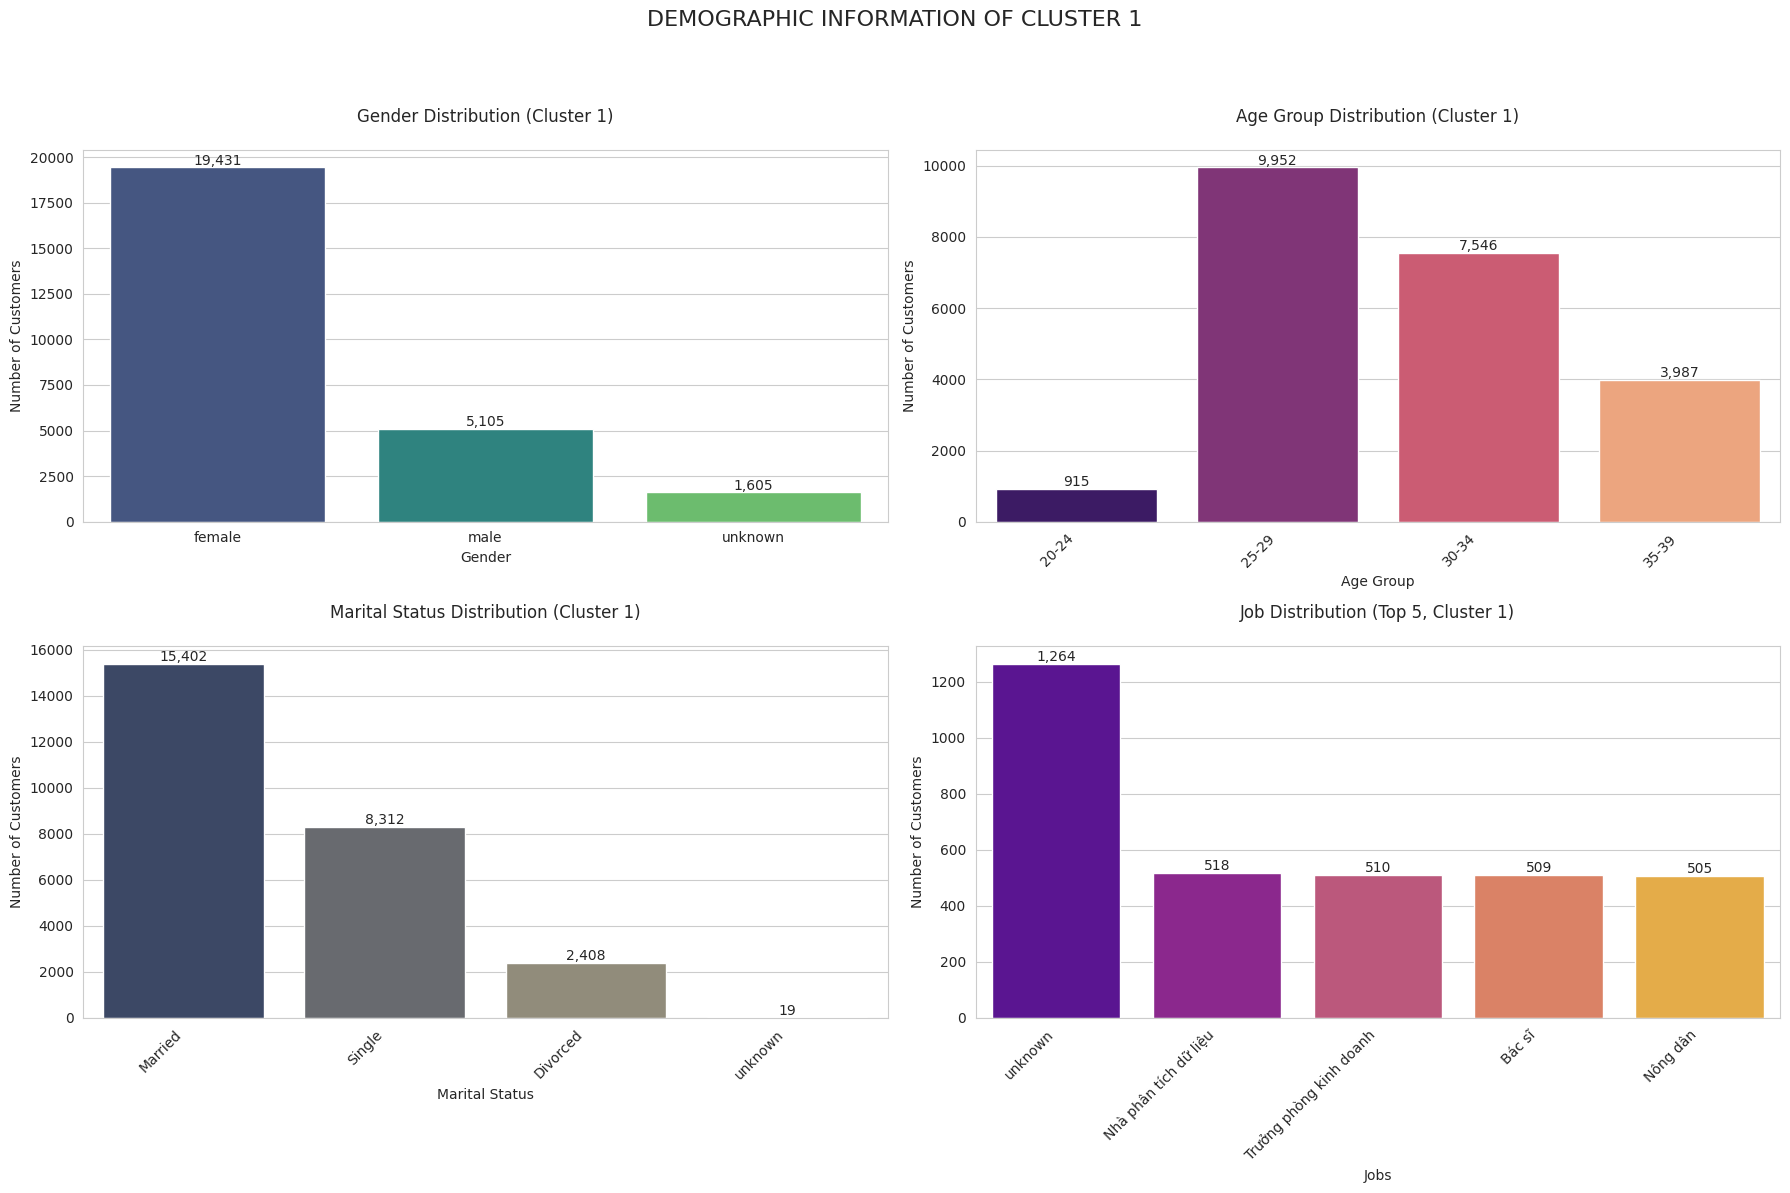

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


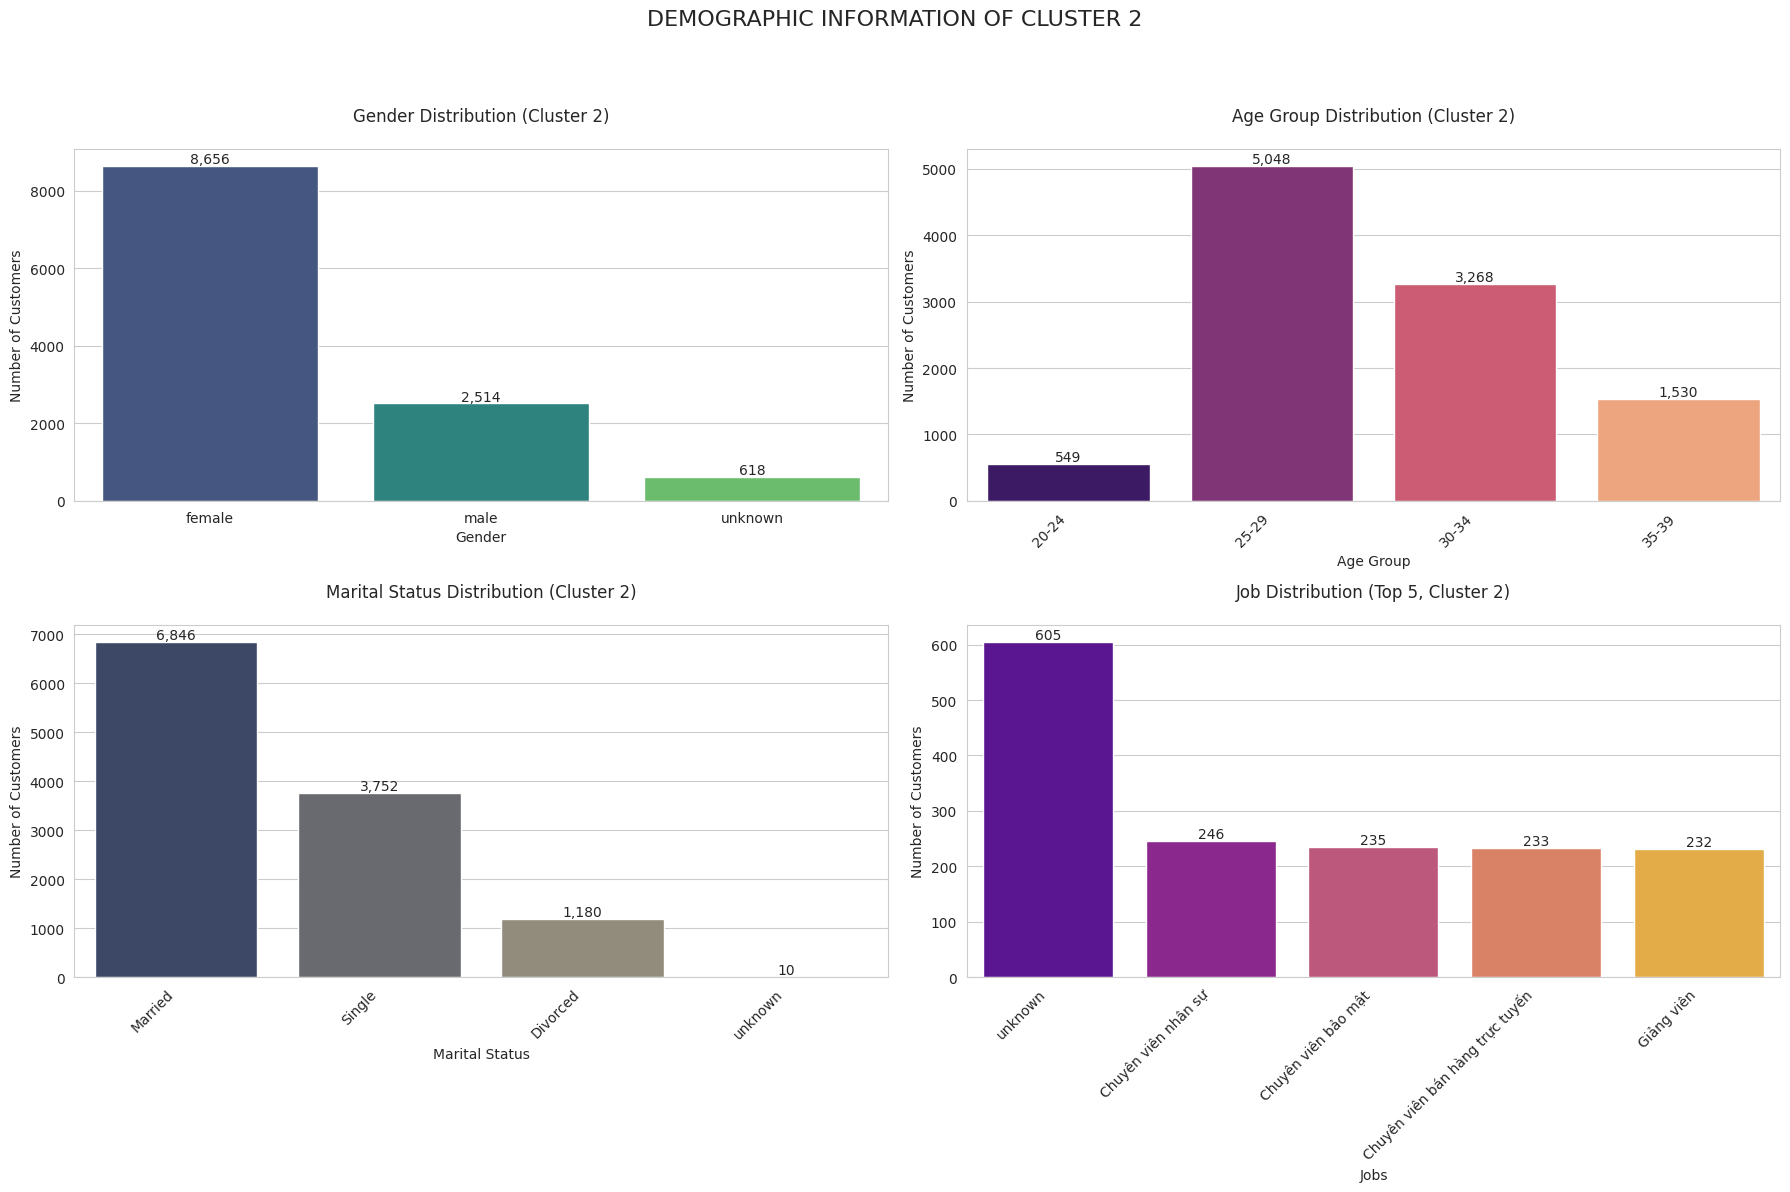

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 


purchases = user_plot_log[user_plot_log['action'] == 'purchase'].copy()
purchases['datetime'] = pd.to_datetime(purchases['datetime'], errors='coerce')
purchases = purchases.dropna(subset=['datetime'])
purchases['month'] = purchases['datetime'].dt.month
purchases['day'] = purchases['datetime'].dt.day # Add 'day' column to check for double dates
purchases = purchases[purchases['month'].between(5, 11)]

# Sort data by user_id and datetime (required for IPT)
purchases = purchases.sort_values(by=['user_id', 'datetime'])

print("--- DataFrame 'purchases' after preparation (5-11) ---")
print(purchases.head())
print("\n")

# --- 2. Calculate and filter by IPT (Average Inter-Purchase Time) ---
# Condition: IPT <= 15 days

# Calculate the time interval between consecutive purchases
purchases['time_diff'] = purchases.groupby('user_id')['datetime'].diff().dt.days

# TCalculate average IPT for each user (remove NaN from first transaction)
average_ipt_per_user = purchases.groupby('user_id')['time_diff'].mean().reset_index(name='average_ipt_days')

# Filter user_id that satisfies the condition IPT <= 15
# Remove users with only 1 transaction (IPT is NaN) because they cannot satisfy this condition
ipt_filtered_users_df = average_ipt_per_user[
    (average_ipt_per_user['average_ipt_days'].notna()) &
    (average_ipt_per_user['average_ipt_days'] <= 15)
]
ipt_filtered_user_ids = set(ipt_filtered_users_df['user_id'].tolist())

print("--- Average IPT results per customer and filtered ---")
print(average_ipt_per_user.head())
print(f"\nNumber of customers satisfying IPT <= 15 days: {len(ipt_filtered_user_ids)}")

# --- 3. Calculate and filter by Frequency ---
# Condition: Frequency >= 2 purchases per month (ie total purchases / 7 months >= 2)

# Count total number of purchases for each user in period 5-11
total_purchases_per_user = purchases.groupby('user_id').size().reset_index(name='total_purchases')

# Calculate average frequency per month
total_months_in_period = 7 # From May to November is 7 months
total_purchases_per_user['monthly_avg_frequency'] = total_purchases_per_user['total_purchases'] / total_months_in_period

# Filter user_id that satisfies the condition Frequency >= 2 purchases per month
frequency_filtered_users_df = total_purchases_per_user[
    total_purchases_per_user['monthly_avg_frequency'] >= 1.5
]
frequency_filtered_user_ids = set(frequency_filtered_users_df['user_id'].tolist())

print("--- Average Frequency per month and filtered ---")
print(total_purchases_per_user.head())
print(f"\nNumber of customers satisfying Frequency >= 2 purchases/month: {len(frequency_filtered_user_ids)}")


# --- 4. Calculate and filter by Recency ---
# Condition: Recency <= 20 days

# Define reference date: Last day in filtered purchase data set + 1 day

reference_date = purchases['datetime'].max() + pd.Timedelta(days=1)

# Find the last purchase date of each customer
last_purchase_date_per_user = purchases.groupby('user_id')['datetime'].max()

# Calculate Recency (number of days since last purchase to reference date)
recency_df = (reference_date - last_purchase_date_per_user).dt.days.reset_index(name='Recency')

# Filter user_ids that satisfy the condition Recency <= 20 days
recency_filtered_users_df = recency_df[recency_df['Recency'] <= 20]
recency_filtered_user_ids = set(recency_filtered_users_df['user_id'].tolist())

print("--- Recency results for each customer and filter ---")
print(recency_df.head())
print(f"\nNumber of customers that satisfy Recency <= 20 days: {len(recency_filtered_user_ids)}")


# --- 5. Calculate Sale Ratio for EACH CUSTOMER and filter by safe threshold ---
# Define double days (sale days) from May to November
double_days = set([(m, m) for m in range(5, 12)]) # (5,5), (6,6), ..., (11,11)

# Add 'is_double_day_sale' flag column to DataFrame purchases
purchases['is_double_day_sale'] = purchases.apply(
    lambda row: (row['month'], row['day']) in double_days, axis=1
)

# Count the number of purchases on sale days and weekdays for each user
user_sale_regular_counts = purchases.groupby('user_id')['is_double_day_sale'].agg(
    sale_purchases='sum',
    regular_purchases=lambda x: (~x).sum() # count False (not sale)
).reset_index()

# Calculate Sale Ratio for each user
# To avoid division by zero, handle the case where regular_purchases is 0
# If regular_purchases = 0, sale_ratio = np.inf (infinity)
# If sale_purchases = 0 and regular_purchases = 0 (user has no purchases), sale_ratio = np.nan
user_sale_regular_counts['sale_ratio'] = user_sale_regular_counts.apply(
    lambda row: row['sale_purchases'] / row['regular_purchases'] if row['regular_purchases'] > 0 else np.inf,
    axis=1
)

# --- Determine the safe threshold for Sale Ratio ---
# Criteria: 0.5 <= sale_ratio <= 2.0 AND regular_purchases > 0 (to exclude inf)
# This ensures that customers purchase both regular and sale days, and the ratio is not too different.
safe_sale_ratio_lower_bound = 0.0
safe_sale_ratio_upper_bound = 2.5

sale_ratio_filtered_users_df = user_sale_regular_counts[
    (user_sale_regular_counts['sale_ratio'] >= safe_sale_ratio_lower_bound) &
    (user_sale_regular_counts['sale_ratio'] <= safe_sale_ratio_upper_bound) &
    (user_sale_regular_counts['regular_purchases'] > 0) # Eliminate people who only buy on sale days (sale_ratio = inf)
]
sale_ratio_filtered_user_ids = set(sale_ratio_filtered_users_df['user_id'].tolist())

print("--- Sales Ratio results for each customer and filtered by safe threshold ---")
print(user_sale_regular_counts.head())
print("\nDescriptive statistics of Sales Ratio for each customer (excluding inf):")
sale_ratio_finite = user_sale_regular_counts[user_sale_regular_counts['sale_ratio'] != np.inf]['sale_ratio']
print(sale_ratio_finite.describe())
print("\nQuarantines of Sales Ratio (excluding inf):")
print(sale_ratio_finite.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99]))

print(f"\nNumber of customers satisfying Safe Sale Ratio ({safe_sale_ratio_lower_bound:.1f} <= SR <= {safe_sale_ratio_upper_bound:.1f}): {len(sale_ratio_filtered_user_ids)}")

# print(f"List of user_ids satisfying Safe Sale Ratio: {sorted(list(sale_ratio_filtered_user_ids))}\n")

# --- 6. Combine all conditions (IPT, Frequency, Recency, Safe Sale Ratio) ---
# Find the intersection of 4 filtered user_id sets
final_segment_users_loyal_balanced = list(
    ipt_filtered_user_ids.intersection(
        frequency_filtered_user_ids
    ).intersection(
        recency_filtered_user_ids
    ).intersection(
        sale_ratio_filtered_user_ids # Add safe Sale Ratio condition
    )
)

print("=" * 50)
print("--- BALANCED LOYAL CUSTOMER SEGMENT RESULTS ---")
print(f"Total number of customers satisfying all 4 conditions:")
print(f" - IPT <= 15 days")
print(f" - Frequency >= 2 transactions/month (average in 7 months)")
print(f" - Recency <= 20 days")
print(f" - Safe Sale Ratio ({safe_sale_ratio_lower_bound:.1f} <= SR <= {safe_sale_ratio_upper_bound:.1f})")
print(f"Number: {len(final_segment_users_loyal_balanced)} customers")
# print(f"List of user_ids: {sorted(final_segment_users_loyal_balanced)}")
print("=" * 50)


# --- 7. Analysis of double day (sale day) purchases TOTAL (unchanged) ---
print("\n" + "=" * 50)
print("--- DOUBLE DAY (SALE DAY) ANALYSIS TOTAL ---")

# Calculate total purchases
total_purchases_overall = len(purchases)

# Calculate purchases on sale day (double day)
sale_day_purchases_overall = purchases[purchases['is_double_day_sale']].shape[0]

# Calculate purchases on regular days
regular_day_purchases_overall = total_purchases_overall - sale_day_purchases_overall

print(f"Total purchases in the period May-Nov: {total_purchases_overall:,}")
print(f"Total purchases on double day (sale day): {sale_day_purchases_overall:,}")
print(f"Total number of purchases on weekdays: {regular_day_purchases_overall:,}")

# Print out the number of purchases for each day
print("\nThe number of purchases for each day:")
for month_day_tuple in sorted(list(double_days)):
    month, day = month_day_tuple
    purchases_on_this_double_day = purchases[
        (purchases['month'] == month) & (purchases['day'] == day)
    ].shape[0]
    print(f"  Ngày {day}/{month}: {purchases_on_this_double_day:,} lượt purchase")


# Calculate the ratio of purchase on sale day to purchase on normal day TOTAL
if regular_day_purchases_overall > 0:
    sale_to_regular_ratio_overall = sale_day_purchases_overall / regular_day_purchases_overall
    print(f"\Sale day Purchase / Regular day Purchase ratio (OVERALL): {sale_to_regular_ratio_overall:.2f}")
else:
    print("There are no purchases on weekdays to calculate the rate.")

print("=" * 50)


# --- 8. Draw a chart to visualize the results ---
print("\n" + "=" * 50)
print("--- ANALYSIS RESULTS VISUALIZATION CHART ---")

# Get the total number of unique customers in the period T5-T11
total_unique_users = len(purchases['user_id'].unique())

# Create figures and axes for the charts
fig, axes = plt.subplots(3, 1, figsize=(12, 20)) # 3 rows, 1 column

# Chart 1: Number of customers satisfying each individual condition

condition_counts = {
    'IPT <= 15 ngày': len(ipt_filtered_user_ids),
    'Frequency >= 2/tháng': len(frequency_filtered_user_ids),
    'Recency <= 20 ngày': len(recency_filtered_user_ids),
    f'Sale Ratio an toàn ({safe_sale_ratio_lower_bound:.1f}-{safe_sale_ratio_upper_bound:.1f})': len(sale_ratio_filtered_user_ids)
}
conditions = list(condition_counts.keys())
counts = list(condition_counts.values())

axes[0].bar(conditions, counts, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[0].set_title('Number of customers satisfying each individual condition', fontsize=14)
axes[0].set_ylabel('Number of customers', fontsize=12)
axes[0].tick_params(axis='x', rotation=20)
for i, v in enumerate(counts):
    axes[0].text(i, v + 0.01 * max(counts), f"{v:,}", ha='center', va='bottom', fontsize=10)


# Chart 2: Sales Ratio Distribution (excluding inf)
# Calculate Quartiles
q1_sale_ratio = sale_ratio_finite.quantile(0.25)
median_sale_ratio = sale_ratio_finite.quantile(0.50)
q3_sale_ratio = sale_ratio_finite.quantile(0.75)

axes[1].hist(sale_ratio_finite, bins=50, color='purple', alpha=0.7)
axes[1].set_title('Sales Ratio Distribution by Customer (Excluding Inf)', fontsize=14)
axes[1].set_xlabel('Sale Ratio (Sale Purchases / Regular Purchases)', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)

# Add lines for new safe thresholds (0.0 and 2.5)
axes[1].axvline(x=safe_sale_ratio_lower_bound, color='red', linestyle='--', label=f'Sale Ratio Lower Boundary ({safe_sale_ratio_lower_bound:.1f})')
axes[1].axvline(x=safe_sale_ratio_upper_bound, color='red', linestyle='--', label=f'Sale Ratio Upper Boundary ({safe_sale_ratio_upper_bound:.1f})')

# Add lines for quartiles
axes[1].axvline(x=q1_sale_ratio, color='blue', linestyle=':', label=f'Q1 ({q1_sale_ratio:.2f})')
axes[1].axvline(x=median_sale_ratio, color='green', linestyle=':', label=f'Median ({median_sale_ratio:.2f})')
axes[1].axvline(x=q3_sale_ratio, color='orange', linestyle=':', label=f'Q3 ({q3_sale_ratio:.2f})')

# Add color range for Interquartile Range (IQR)
axes[1].axvspan(q1_sale_ratio, q3_sale_ratio, color='blue', alpha=0.2, label=f'IQR ({q1_sale_ratio:.2f}-{q3_sale_ratio:.2f})')

# Add value annotations to the quartiles
axes[1].text(q1_sale_ratio, axes[1].get_ylim()[1] * 0.95, f'Q1: {q1_sale_ratio:.2f}', color='blue', ha='center', va='top', fontsize=9)
axes[1].text(median_sale_ratio, axes[1].get_ylim()[1] * 0.90, f'Median: {median_sale_ratio:.2f}', color='green', ha='center', va='top', fontsize=9)
axes[1].text(q3_sale_ratio, axes[1].get_ylim()[1] * 0.85, f'Q3: {q3_sale_ratio:.2f}', color='orange', ha='center', va='top', fontsize=9)

# Add value annotation for safety thresholds
axes[1].text(safe_sale_ratio_lower_bound, axes[1].get_ylim()[1] * 0.80, f'Lower threshold: {safe_sale_ratio_lower_bound:.1f}', color='red', ha='center', va='top', fontsize=9)
axes[1].text(safe_sale_ratio_upper_bound, axes[1].get_ylim()[1] * 0.80, f'Upper threshold: {safe_sale_ratio_upper_bound:.1f}', color='red', ha='center', va='top', fontsize=9)

axes[1].legend()
axes[1].set_xlim(0, sale_ratio_finite.quantile(0.99) * 1.1) # Limit the x-axis for better visibility

# Chart 3: Comparing Balanced Loyalty Count with Total Unique Customers
final_loyal_count = len(final_segment_users_loyal_balanced)
comparison_labels = ['Balanced Loyalty Count', 'Total Unique Customers']
comparison_values = [final_loyal_count, total_unique_users]

axes[2].bar(comparison_labels, comparison_values, color=['teal', 'gray'])
axes[2].set_title('Comparing Balanced Loyalty Count with Total Unique Customers', fontsize=14)
axes[2].set_ylabel('Customer Count', fontsize=12)
axes[2].tick_params(axis='x', rotation=10)
for i, v in enumerate(comparison_values):
    axes[2].text(i, v + 0.01 * max(comparison_values), f"{v:,}", ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

print("=" * 50)


# --- Get demographic information ---
# Convert final_segment_users_loyal_balanced list to DataFrame to join
loyal_users_df = pd.DataFrame({'user_id': final_segment_users_loyal_balanced})

print("--- DataFrame 'loyal_users_df' (from the loyal customer list) ---")
print(loyal_users_df.head())
print("\n")

# Perform a join (merge) of the two DataFrames
# Use an 'inner' join to get only user_ids that are in both tables
demographic_info_loyal_users = pd.merge(
    loyal_users_df,
    user_plot_HT_info,
    on='user_id',
    how='inner'
)

print("--- DEMOGRAPHIC INFORMATION OF BALANCED LOYAL CUSTOMERS ---")
print(demographic_info_loyal_users.head())
print(f"\nTotal number of loyal customers with demographic information: {len(demographic_info_loyal_users)}")

# You can continue to analyze demographic information here, for example:
print("\n--- Gender statistics of loyal customers ---")
print(demographic_info_loyal_users['sex'].value_counts()) # Removed observed=False

print("\n--- Age group statistics of loyal customers ---")
# Ensure 'age' column is numeric for binning
# If your actual 'age' column is already numeric, you can skip the 'age_numeric' conversion.
# For this example, I've made 'age' numeric in user_info_data.
bins = [15, 20, 30, 40] # New bins: 15-19, 20-29, 30-39
labels = ['15-19', '20-29', '30-39'] # New labels
demographic_info_loyal_users['age_group'] = pd.cut(
    demographic_info_loyal_users['age'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)
print(demographic_info_loyal_users['age_group'].value_counts().sort_index()) # Removed observed=False


print("\n--- Loyal customer marital status statistics ---")
print(demographic_info_loyal_users['marital_status'].value_counts()) # Removed observed=False

print("\n--- Loyal customer job statistics ---")
print(demographic_info_loyal_users['job'].value_counts()) # Removed observed=False

# --- Demographic information charting ---
print("\n" + "=" * 50)
print("--- DEMOGRAPHIC INFORMATION CHART OF LOYAL CUSTOMERS ---")

# 1. Age grouping
bins = [15, 20, 30, 40,50,60] # New bins: 15-19, 20-29, 30-39
# labels = ['15-19', '20-29', '30-39'] # New labels
labels =['20-24', '25-29', '30-34', '35-39','40-50']
demographic_info_loyal_users['age_group'] = pd.cut(
    demographic_info_loyal_users['age'],
    bins=bins,
    labels=labels,
    right=False, 
    include_lowest=True 
)


# 2. Set the common figure size for the charts
plt.figure(figsize=(18, 18)) # Increase the size of the figure to accommodate 5 charts
sns.set_style("whitegrid") # Set the style for the chart
plt.suptitle("DEMOGRAPHIC INFORMATION OF LOYAL CUSTOMERS", fontsize=16, y=1.02)

# 3. Gender chart (Sex)
plt.subplot(3, 2, 1) # Create a subplot with 3 rows, 2 columns, position 1
sex_plot = sns.countplot(data=demographic_info_loyal_users, x='sex', palette='viridis') # Removed observed=False
plt.title('Gender Distribution', pad=20)
plt.xlabel('Gender')
plt.ylabel('Number of customers row')

# Add data on each column
for p in sex_plot.patches:
    sex_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

# 4. Age Group Chart
plt.subplot(3, 2, 2) # Position 2
# Ensure the display order of age groups
# age_group_order = ['15-19', '20-29', '30-39']
age_group_order = ['20-24', '25-29', '30-34', '35-39','40-50']
age_group_plot = sns.countplot(data=demographic_info_loyal_users, x='age_group', palette='magma', order=age_group_order) # Removed observed=False
plt.title('Age Group Distribution', pad=20)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

# Add data per column
for p in age_group_plot.patches:
    age_group_plot.annotate(f'{p.get_height():,.0f}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center',
                            xytext=(0, 5),
                            textcoords='offset points')

# 5. Marital Status Chart
plt.subplot(3, 2, 3) # Position 3
# Get the order of values
marital_status_order = demographic_info_loyal_users['marital_status'].value_counts().index # Removed observed=False
marital_plot = sns.countplot(data=demographic_info_loyal_users, x='marital_status',
palette='cividis',
order=marital_status_order) # Removed observed=False
plt.title('Marital Status Distribution', pad=20)
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Add data per column
for p in marital_plot.patches:
    marital_plot.annotate(f'{p.get_height():,.0f}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')

# 6. Job Chart - SHOW ONLY TOP 10 JOBS
plt.subplot(3, 2, 4) # Position 4
# Get top 10 jobs with highest number of users
top_10_jobs = demographic_info_loyal_users['job'].value_counts().nlargest(10).index # Removed observed=False
job_plot = sns.countplot(data=demographic_info_loyal_users, x='job',
                         palette='plasma',
                         order=top_10_jobs) # Removed observed=False
plt.title('Job Distribution (Top 10)', pad=20)
plt.xlabel('Job')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Add data per column
for p in job_plot.patches:
    job_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) 
plt.show() 

print("=" * 50)

# --- K-means Clustering for Loyal Customers ---
print("\n" + "=" * 50)
print("--- K-MEANS CLUSTERING FOR LOYAL CUSTOMERS ---")

# 1. Prepare data for K-means

# Start with loyal_users_df (containing loyal customer user_ids)
loyal_customers_df_for_kmeans = loyal_users_df.copy() # Rename variables to avoid confusion with loyal_customers_features_data

# Merge with IPT
loyal_customers_df_for_kmeans = pd.merge(
    loyal_customers_df_for_kmeans,
    average_ipt_per_user[['user_id', 'average_ipt_days']],
    on='user_id',
    how='left' 
)

# Merge with Frequency
loyal_customers_df_for_kmeans = pd.merge(
    loyal_customers_df_for_kmeans,
    total_purchases_per_user[['user_id', 'monthly_avg_frequency']],
    on='user_id',
    how='left'
)

# Merge with Recency
loyal_customers_df_for_kmeans = pd.merge(
    loyal_customers_df_for_kmeans,
    recency_df[['user_id', 'Recency']],
    on='user_id',
    how='left'
)

# Merge with Sale Ratio
loyal_customers_df_for_kmeans = pd.merge(
    loyal_customers_df_for_kmeans,
    user_sale_regular_counts[['user_id', 'sale_ratio']],
    on='user_id',
    how='left'
)

# Handle NaNs in feature columns if present (e.g. because some user_id doesn't have enough transactions to calculate IPT/Sale Ratio)
# Although the previous filtering steps have mitigated it, it's still worth checking.
# For Sale Ratio, the value 'inf' (infinity) needs to be handled.
# Replace inf with a large value or NaN so that StandardScaler can handle it.
loyal_customers_df_for_kmeans['sale_ratio'] = loyal_customers_df_for_kmeans['sale_ratio'].replace([np.inf, -np.inf], np.nan)
loyal_customers_df_for_kmeans.fillna(loyal_customers_df_for_kmeans.mean(numeric_only=True), inplace=True) # Điền các giá trị NaN bằng giá trị trung bình

# Select features for clustering
features_for_clustering = [
    'average_ipt_days',
    'monthly_avg_frequency',
    'Recency',
    'sale_ratio'
]
X = loyal_customers_df_for_kmeans[features_for_clustering]

print("--- Prepared data for K-means (top 5 rows) ---")
print(X.head())
print(f"\nNumber of customers to be clustered: {len(X)}")
print(f"Check for NaNs after processing: {X.isnull().sum().sum()}") # Make sure there are no NaNs

# 2. Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering, index=X.index)

print("\n--- Standardized data (top 5 rows) ---")
print(X_scaled_df.head())

# 3. Determine the optimal number of clusters (Elbow Method)
inertia = []
# Try K from 1 to 10 (or a range that fits your data)
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# draw Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow method for determining the optimal number of clusters')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("\n--- Please view the Elbow plot and choose the appropriate number of clusters (K). ---")
print("The 'elbow' point (elbow) is where the curve starts to flatten, indicating that adding more clusters does not provide much improvement.")

# 4. Apply K-means with the selected number of clusters
optimal_k = 3

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
loyal_customers_df_for_kmeans['cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"\n--- K-means clustering with K = {optimal_k} is complete. ---")
print(f"Number of customers in each cluster:")
print(loyal_customers_df_for_kmeans['cluster'].value_counts().sort_index())

# 5. Analyze the characteristics of each cluster
print("\n--- Average characteristics of loyal customer clusters ---")
cluster_profiles = loyal_customers_df_for_kmeans.groupby('cluster')[features_for_clustering].mean()
print(cluster_profiles)

# For better understanding, we can print the normalized mean values
print("\n--- Normalized average characteristics of loyal customer clusters ---")
cluster_profiles_scaled = pd.DataFrame(scaler.transform(cluster_profiles), columns=features_for_clustering, index=cluster_profiles.index)
print(cluster_profiles_scaled)

print("\n--- Explain the clusters (example with K=3) ---")
if optimal_k == 3:
    print("Cluster 0:")
    print("- High Recency: Probably a customer who has purchased recently but not too often.")
    print("- Average Frequency and IPT: Purchases regularly but not too densely.")
    print("- Average Sale Ratio: Purchases both on sale days and on weekdays.")
    print("\nCluster 1:")
    print("- Low Recency, High Frequency, Low IPT: 'Super Frequent Buyers' - buy very often and recently.")
    print("- Low Sale Ratio: Less influenced by promotions, impulse buys.")
    print("\nCluster 2:")
    print("- Low Recency, Medium Frequency, Medium IPT: 'Newly engaged loyalists' - buy recently, with moderate frequency and IPT.")
    print("- High Sale Ratio: Tends to buy more on sale days.")
elif optimal_k == 4: 
    print("Cụm 0: ...")
    # print("Cụm 1: ...")
    # print("Cụm 2: ...")
    # print("Cụm 3: ...")

print("=" * 50)

# --- Demographic information for each cluster ---
print("\n" + "=" * 50)
print("--- DEMOGRAPHIC INFORMATION FOR EACH LOYAL CUSTOMER CLUSTER ---")

# Merge DataFrame loyal_customers_df_for_kmeans (with column 'cluster') with demographic_info_loyal_users
# demographic_info_loyal_users already contains user_id and demographic columns
clustered_demographics = pd.merge(
    loyal_customers_df_for_kmeans[['user_id', 'cluster']],
    demographic_info_loyal_users,
    on='user_id',
    how='inner'
)

print("\n--- Gender Distribution by Cluster ---")
# Use normalize='index' to see the percentage in each cluster
print(pd.crosstab(clustered_demographics['cluster'], clustered_demographics['sex'], normalize='index'))

print("\n--- Age Group Distribution by Cluster ---")
# Ensure the order of the age groups when displaying
# age_group_order = ['15-19', '20-29', '30-39'] # Old age group order
# print(pd.crosstab(clustered_demographics['cluster'], clustered_demographics['age_group'], normalize='index')[age_group_order]) # Old print

print("\n--- Marital Status Distribution by Cluster ---")
print(pd.crosstab(clustered_demographics['cluster'], clustered_demographics['marital_status'], normalize='index'))

print("\n--- Job Distribution (Top 5 per cluster) by cluster ---")
# To avoid too much information, only show top N jobs for each cluster
for cluster_id in sorted(clustered_demographics['cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    job_counts = clustered_demographics[clustered_demographics['cluster'] == cluster_id]['job'].value_counts(normalize=True).nlargest(5)
    print(job_counts)

print("=" * 50)

# --- Demographic Chart for EACH CLUSTER ---
print("\n" + "=" * 50)
print("--- DEMOGRAPHIC INFORMATION CHART FOR EACH LOYAL CUSTOMER CLUSTER ---")

# Re-define age_group for cluster-specific plots with the new bins
bins_cluster_age = [20, 25, 30, 35, 40]
labels_cluster_age = ['20-24', '25-29', '30-34', '35-39']

# Apply this new age grouping to the clustered_demographics DataFrame for plotting
clustered_demographics['age_group_cluster_plot'] = pd.cut(
    clustered_demographics['age'],
    bins=bins_cluster_age,
    labels=labels_cluster_age,
    right=False,
    include_lowest=True
)

for cluster_id in sorted(clustered_demographics['cluster'].unique()):
    cluster_data = clustered_demographics[clustered_demographics['cluster'] == cluster_id]

    plt.figure(figsize=(18, 12)) # Figure for each cluster
    plt.suptitle(f"DEMOGRAPHIC INFORMATION OF CLUSTER {cluster_id}", fontsize=16, y=1.02)
    
    # 1. Gender plot (Sex)
    plt.subplot(2, 2, 1)
    sex_plot = sns.countplot(data=cluster_data, x='sex', palette='viridis') # Removed observed=False
    plt.title(f'Gender Distribution (Cluster {cluster_id})', pad=20)
    plt.xlabel('Gender')
    plt.ylabel('Number of Customers')
    for p in sex_plot.patches:
        sex_plot.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # 2. Age Group Chart - USING age_group_cluster_plot
    plt.subplot(2, 2, 2)
    age_plot = sns.countplot(data=cluster_data, x='age_group_cluster_plot', palette='magma', order=labels_cluster_age) # Removed observed=False
    plt.title(f'Age Group Distribution (Cluster {cluster_id})', pad=20)
    plt.xlabel('Age Group')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    for p in age_plot.patches:
        age_plot.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # 3. Marital Status Chart
    plt.subplot(2, 2, 3)
    marital_status_order = cluster_data['marital_status'].value_counts().index # Removed observed=False
    marital_plot = sns.countplot(data=cluster_data, x='marital_status', palette='cividis', order=marital_status_order) # Removed observed=False
    plt.title(f'Marital Status Distribution (Cluster {cluster_id})', pad=20)
    plt.xlabel('Marital Status')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    for p in marital_plot.patches:
        marital_plot.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # 4. Job Chart - SHOW ONLY TOP 5 JOBS
    plt.subplot(2, 2, 4)
    top_5_jobs = cluster_data['job'].value_counts().nlargest(5).index # Removed observed=False
    job_plot = sns.countplot(data=cluster_data, x='job', palette='plasma', order=top_5_jobs) # Removed observed=False
    plt.title(f'Job Distribution (Top 5, Cluster {cluster_id})', pad=20)
    plt.xlabel('Jobs')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    for p in job_plot.patches:
        job_plot.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

print("=" * 50)


# Deal-hunter 

# Feature Engineering

# Model Training

In [44]:
train =  pd.read_csv('/Users/giahuy/Downloads/00. BỘ DỮ LIỆU/train.csv')
test = pd.read_csv('/Users/giahuy/Downloads/00. BỘ DỮ LIỆU/test.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/giahuy/Downloads/00. BỘ DỮ LIỆU/train.csv'

In [ ]:
# Set up the figure with two subplots side by side
plt.figure(figsize=(15, 6))

# Plot distribution of labels in train data
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='label')
plt.title('Distribution of Labels in Train Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Add percentage labels on train plot
total = len(train)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()),
                      ha='center', va='bottom')

# Plot distribution of labels in test data  
plt.subplot(1, 2, 2)
sns.countplot(data=test, x='label')
plt.title('Distribution of Labels in Test Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Add percentage labels on test plot
total = len(test)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()),
                      ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Drop NaN values from train data
train = train.dropna()

# Drop rows where label is -1
train = train[train['label'] != -1]

print("\nShape of train data after dropping NaN and -1 values:")
print(train.shape)

# Verify no more NaN or -1 values remain
print("\nNaN values in cleaned train data:")
print(train.isna().sum())
print("\nCount of -1 labels in cleaned train data:", len(train[train['label'] == -1]))


In [ ]:
# Get unique users from train data
train_users = set(train['user_id'].unique())

# Get unique users from user_features
user_features_users = set(user_features['user_id'].unique())

# Find users in train that are not in user_features
missing_users = train_users - user_features_users

print("Number of users in train data:", len(train_users))
print("Number of users in user_features:", len(user_features_users))
print("\nNumber of users in train that are not in user_features:", len(missing_users))

if len(missing_users) > 0:
    print("\nFirst 5 missing users:")
    print(list(missing_users)[:5])
    
    # Get sample rows from train data for missing users
    print("\nSample rows from train data for missing users:")
    print(train[train['user_id'].isin(list(missing_users)[:5])])


In [ ]:
# Drop users from train that are not in user_features
train = train[train['user_id'].isin(user_features['user_id'])]

print("Shape of train data after dropping missing users:")
print(train.shape)

# Verify all users in train are now in user_features
train_users = set(train['user_id'].unique())
user_features_users = set(user_features['user_id'].unique())
missing_users = train_users - user_features_users

print("\nNumber of users in train that are not in user_features after dropping:", len(missing_users))


In [ ]:
# Get unique merchants from train data
train_merchants = set(train['merchant_id'].unique())

# Get unique merchants from merchant_features
merchant_features_merchants = set(merchant_features['merchant_id'].unique())

# Find merchants in train that are not in merchant_features
missing_merchants = train_merchants - merchant_features_merchants

print("Number of merchants in train data:", len(train_merchants))
print("Number of merchants in merchant_features:", len(merchant_features_merchants))
print("\nNumber of merchants in train that are not in merchant_features:", len(missing_merchants))

if len(missing_merchants) > 0:
    print("\nFirst 5 missing merchants:")
    print(list(missing_merchants)[:5])
    
    # Get sample rows from train data for missing merchants
    print("\nSample rows from train data for missing merchants:")
    print(train[train['merchant_id'].isin(list(missing_merchants)[:5])])


In [ ]:
# Merge train data with user and merchant features
train_merged = train.merge(user_features, on='user_id', how='left')
train_merged = train_merged.merge(merchant_features, on='merchant_id', how='left')

print("Shape of merged train data:")
print(train_merged.shape)

print("\nColumns in merged train data:")
print(train_merged.columns.tolist())

# Check for any NaN values after merging
print("\nNaN values in merged train data:")
print(train_merged.isna().sum())


In [ ]:
# Get unique users from test data
test_users = set(test['user_id'].unique())

# Get unique users from user_features
user_features_users = set(user_features['user_id'].unique())

# Find users in test that are not in user_features
missing_users_test = test_users - user_features_users

print("Number of users in test data:", len(test_users))
print("Number of users in user_features:", len(user_features_users))
print("\nNumber of users in test that are not in user_features:", len(missing_users_test))

if len(missing_users_test) > 0:
    print("\nFirst 5 missing users:")
    print(list(missing_users_test)[:5])
    
    # Get sample rows from test data for missing users
    print("\nSample rows from test data for missing users:")
    print(test[test['user_id'].isin(list(missing_users_test)[:5])])

# Merge test data with user features
test_merged = test.merge(user_features, on='user_id', how='left')
test_merged = test_merged.merge(merchant_features, on='merchant_id', how='left')

print("\nShape of merged test data:")
print(test_merged.shape)

print("\nColumns in merged test data:")
print(test_merged.columns.tolist())

# Check for any NaN values after merging
print("\nNaN values in merged test data:")
print(test_merged.isna().sum())


In [ ]:
# Get users that are in both test and user_features
valid_users = test_users.intersection(user_features_users)

# Filter test data to only include users that are in user_features
test = test[test['user_id'].isin(valid_users)]

print("\nShape of test data after dropping missing users:")
print(test.shape)


In [ ]:
# Import SMOTE for oversampling
from imblearn.over_sampling import SMOTE

# Separate features and target for train data
X_train = train_merged.drop('label', axis=1)
y_train = train_merged['label']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Create balanced train dataframe
train_balanced = pd.concat([pd.DataFrame(X_train_balanced, columns=X_train.columns), 
                          pd.Series(y_train_balanced, name='label')], axis=1)

# Plot distribution before and after SMOTE
plt.figure(figsize=(15, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='label')
plt.title('Distribution Before SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')

# Add percentage labels
total = len(train)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()),
                      ha='center', va='bottom')

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(data=train_balanced, x='label')
plt.title('Distribution After SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')

# Add percentage labels
total = len(train_balanced)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()),
                      ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nShape of data before SMOTE:", train.shape)
print("Shape of data after SMOTE:", train_balanced.shape)
print("\nClass distribution before SMOTE:\n", train['label'].value_counts(normalize=True))
print("\nClass distribution after SMOTE:\n", train_balanced['label'].value_counts(normalize=True))


### Gradient Boosted Tree

In [ ]:
# Prepare features and target (using your existing X_train, y_train, X_test, y_test)
X_train = train_balanced.drop('label', axis=1)
y_train = train_balanced['label']
X_test = test_merged.drop('label', axis=1)
y_test = test_merged['label']
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Enhanced parameter grid
param_grid = {
    'max_depth': [4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'learning_rate': [0.01, 0.03, 0.05],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

# Initialize model with better parameters for imbalanced data
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight * 1.5,
    max_delta_step=1,
    use_label_encoder=False,
    eval_metric=['auc', 'logloss'],
    random_state=42
)

# Grid search with F1 score
f1_scorer = 'f1'
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters
print("\nBest parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Test more threshold values
thresholds = np.arange(0.2, 0.6, 0.05)
results = []

y_prob = grid_search.best_estimator_.predict_proba(X_test)

for thresh in thresholds:
    y_pred = (y_prob[:, 1] >= thresh).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        'threshold': thresh,
        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1_1': report['1']['f1-score']
    })

# Show results
results_df = pd.DataFrame(results)
print("\nResults for different thresholds:")
print(results_df)

In [ ]:
print(f"Best threshold: {thresh}")


In [ ]:
# Get best model from grid search
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
best_model = grid_search.best_estimator_
# Apply threshold of 0.55 to predictions
threshold = 0.55
y_pred = (best_model.predict_proba(X_test)[:,1] >= threshold).astype(int)

# Make predictions on test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8,6))
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  
# Calculate average metrics for XGBoost model evaluation
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_prob[:,1])
}

# Create a DataFrame for visualization
metrics_summary = pd.DataFrame({
    'Metric': list(metrics.keys()),
    'Score': list(metrics.values())
})

# Print metrics
print("\nModel Performance Metrics:")
for metric, score in metrics.items():
    print(f"{metric}: {score:.4f}")

# Visualize metrics
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=metrics_summary, palette='viridis')
plt.title('XGBoost Model Performance Metrics')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np
# Sample a subset of data for tuning
from sklearn.utils import resample
X_sample, y_sample = resample(X_train, y_train, 
                             n_samples=min(10000, len(X_train)),
                             random_state=42)
# 1. Initialize Random Forest with optimized base parameters
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,  # Parallelize the base estimator
    class_weight='balanced',  # Handle class imbalance if any
    bootstrap=True,  # Enable bootstrapping for better parallelization
)

# 2. Optimize parameter grid
param_dist = {
    'n_estimators': randint(50, 200),  # Reduced range but still effective
    'max_depth': [None, 10, 20, 30],  # Simplified depth options
    'min_samples_split': randint(2, 10),  # Reduced range
    'min_samples_leaf': randint(1, 5),  # Reduced range
    'max_features': ['sqrt', 'log2']  # Removed 'auto' as it's same as 'sqrt'
}

# 3. Optimize RandomizedSearchCV
rf_random = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of folds
    random_state=42,
    n_jobs=-1,
    verbose=1,
    scoring='roc_auc',  # Specific scoring metric
    return_train_score=False  # Don't compute train scores to save time
)

# 4. Fit random search
rf_random.fit(X_sample, y_sample)

# 5. Get best model and make predictions
best_rf = rf_random.best_estimator_
best_rf.fit(X_train, y_train)
rf_pred = best_rf.predict(X_test)
rf_prob = best_rf.predict_proba(X_test)

# 6. Print results
print("\nRandom Forest Results:")
print("\nBest parameters:", rf_random.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# 7. Optimized plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Plot confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Random Forest Confusion Matrix')
ax1.set_ylabel('True Label')
ax1.set_xlabel('Predicted Label')

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob[:,1])
rf_auc = auc(rf_fpr, rf_tpr)

ax2.plot(rf_fpr, rf_tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {rf_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Random Forest ROC Curve')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
# Calculate and display average metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

# Create a metrics summary dataframe
metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Score': [accuracy, precision, recall, f1, rf_auc]
})

# Display metrics summary with formatted scores
print("\nModel Performance Metrics Summary:")
print(metrics_summary.to_string(index=False, float_format=lambda x: '{:.3f}'.format(x)))

# Visualize metrics
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=metrics_summary, palette='viridis')
plt.title('Random Forest Model Performance Metrics')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)
gb_proba = gb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

# Calculate ROC curve
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_proba)
gb_auc = auc(gb_fpr, gb_tpr)

# Create metrics summary for Gradient Boosting
gb_metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Score': [gb_accuracy, gb_precision, gb_recall, gb_f1, gb_auc]
})

# Plot ROC curve and metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot ROC curve
ax1.plot(gb_fpr, gb_tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {gb_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Gradient Boosting ROC Curve')
ax1.legend(loc="lower right")

# Plot metrics
sns.barplot(x='Metric', y='Score', data=gb_metrics_summary, ax=ax2, palette='viridis')
ax2.set_title('Gradient Boosting Model Performance Metrics')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print metrics summary
print("\nGradient Boosting Model Performance Metrics Summary:")
print(gb_metrics_summary.to_string(index=False, float_format=lambda x: '{:.3f}'.format(x)))


In [ ]:
user_df.head()
if 'month' in user_df.columns:
    user_df = user_df.drop('month',axis=1)


In [ ]:
user_df.head()

In [ ]:
user_log.head()
user_log = user_log.drop(['time_diff', 'sale_day_flag'],axis=1)

In [ ]:
user_log.head()

In [ ]:
user_df = pd.merge(user_df, user_log, on= 'user_id', how='inner')
user_df.head()


In [ ]:
user_metric = user_df
user_metric = user_metric.drop(['age', 'sex', 'job', 'marital_status'],axis=1)
user_metric.head()

In [ ]:
print("Shape of user_df:", user_df.shape)


## Merchant Feature

In [ ]:
# 1. Pre-compute datetime conversion once and store frequently used masks
user_df['month'] = pd.to_datetime(user_df['datetime']).dt.to_period('M')
purchase_mask = user_df['action'] == 'purchase'
purchase_data = user_df[purchase_mask].copy()  # Create copy to avoid warnings

# 2. Use more efficient groupby operations for monthly sales - FIXED THIS PART
monthly_sales = (purchase_data
                .groupby(['merchant_id', 'month'])
                .size()
                .unstack(fill_value=0))  # This creates a pivot table with merchants as rows and months as columns

# 3. Create merchant analysis with merchant_id as a column
merchant_ids = user_df['merchant_id'].unique()
merchant_analysis = pd.DataFrame({'merchant_id': merchant_ids})
merchant_analysis = merchant_analysis.merge(
    monthly_sales.reset_index(),  # Now this contains actual monthly sales data
    on='merchant_id',
    how='left'
)

# 4. Calculate conversion and returning rates using vectorized operations
merchant_counts = user_df.groupby('merchant_id').agg({
    'action': lambda x: (x == 'purchase').sum()
}).rename(columns={'action': 'purchases'})

merchant_counts['total_actions'] = user_df.groupby('merchant_id').size()
merchant_counts['other_actions'] = merchant_counts['total_actions'] - merchant_counts['purchases']
merchant_counts['conversion_rate'] = (merchant_counts['purchases'] / 
                                    merchant_counts['other_actions'].replace(0, np.inf))

# 5. Calculate returning rates more efficiently
purchase_dates_by_merchant_user = (purchase_data
                                 .groupby(['merchant_id', 'user_id'])['datetime']
                                 .nunique()
                                 .reset_index())

returning_stats = (purchase_dates_by_merchant_user
                  .groupby('merchant_id')
                  .agg({
                      'user_id': 'count',
                      'datetime': lambda x: (x > 1).sum()
                  })
                  .rename(columns={
                      'user_id': 'total_users',
                      'datetime': 'returning_users'
                  }))

returning_stats['returning_rate'] = (returning_stats['returning_users'] / 
                                   returning_stats['total_users'])

# 6. Merge all stats together efficiently
final_stats = pd.DataFrame(index=merchant_ids)
final_stats['conversion_rate'] = merchant_counts['conversion_rate']
final_stats['returning_rate'] = returning_stats['returning_rate']
final_stats = final_stats.fillna(0).reset_index().rename(columns={'index': 'merchant_id'})

# 7. Create final merchant analysis DataFrame with merchant_id as first column
merchant_analysis = merchant_analysis.merge(final_stats, on='merchant_id', how='left')

# 8. Calculate total purchases for each merchant
# Now we can sum across all month columns to get total purchases
month_columns = [col for col in merchant_analysis.columns if isinstance(col, pd.Period)]
merchant_analysis['total_purchases'] = merchant_analysis[month_columns].sum(axis=1)

# 9. Calculate total months of data and average purchases
merchant_analysis['total_months'] = merchant_analysis[month_columns].astype(bool).sum(axis=1)
merchant_analysis['total_months'] = merchant_analysis['total_months'].replace(0, 1)  # Avoid division by zero
merchant_analysis['avg_purchases_per_month'] = merchant_analysis['total_purchases'] / merchant_analysis['total_months']

# 10. Ensure merchant_id is the first column and arrange other columns
cols = ['merchant_id'] + month_columns + [
    'total_purchases', 
    'avg_purchases_per_month', 
    'conversion_rate', 
    'returning_rate'
]
merchant_analysis = merchant_analysis[cols]
# Drop month columns from merchant_analysis
month_columns = [col for col in merchant_analysis.columns if isinstance(col, pd.Period)]
merchant_analysis = merchant_analysis.drop(columns=month_columns)


print("Merchant Analysis DataFrame:")
print(merchant_analysis.head())
print("\nShape:", merchant_analysis.shape)

In [ ]:
merchant_analysis.head()

In [ ]:
# Feature selection for merchant analysis
from sklearn.preprocessing import StandardScaler

# Create copy of data for scaling
merchant_features = merchant_analysis.copy()

# Select numerical features for analysis
numerical_features = ['total_purchases', 'avg_purchases_per_month', 'conversion_rate', 'returning_rate']

# Scale the numerical features
scaler = StandardScaler()
merchant_features[numerical_features] = scaler.fit_transform(merchant_features[numerical_features])

# Keep merchant_id and scaled features
merchant_features = merchant_features[['merchant_id'] + numerical_features]

print("Merchant features after scaling:")
print(merchant_features.head())
print("\nFeature statistics:")
print(merchant_features[numerical_features].describe())


## User

In [ ]:
# Calculate user features: Recency, Frequency, and Average Inter-Purchase Time (AIPT)
import numpy as np
import pandas as pd
from datetime import datetime

def calculate_user_metrics(user_df, end_date='2024-11-11'):
    """Calculate user metrics in a memory-efficient way"""
    try:
        # 1. Get only necessary columns for purchase data
        purchase_data = user_metric[user_metric['action'] == 'purchase'][['user_id', 'datetime']].copy()
        
        # 2. Convert datetime efficiently
        purchase_data['datetime'] = pd.to_datetime(purchase_data['datetime'], errors='coerce')
        end_date = pd.to_datetime(end_date)
        
        # 3. Calculate Recency
        print("Calculating recency...")
        # Fixed the syntax error in the date filtering
        purchase_no_last = purchase_data[purchase_data['datetime'] != end_date]
        last_purchase_dates = purchase_no_last.groupby('user_id')['datetime'].max()
        recency = (end_date - last_purchase_dates).dt.days
        
        # 4. Calculate Frequency (monthly)
        print("Calculating frequency...")
        # Add month column without creating a new DataFrame
        purchase_data['month'] = purchase_data['datetime'].dt.to_period('M')
        
        # Calculate average monthly purchases
        monthly_frequency = (purchase_data.groupby(['user_id', 'month'])
                           .size()
                           .reset_index(name='purchases')
                           .groupby('user_id')['purchases']
                           .mean())
        
        # 5. Calculate AIPT more efficiently
        print("Calculating AIPT...")
        def calculate_aipt_vectorized(group):
            if len(group) <= 1:
                return 0
            # Sort dates and calculate differences
            sorted_dates = np.sort(group.values)
            return np.mean(np.diff(sorted_dates).astype('timedelta64[D]').astype(np.float64))
        
        # Calculate AIPT for each user
        aipt = (purchase_data.groupby('user_id')['datetime']
               .agg(calculate_aipt_vectorized))
        
        # 6. Combine metrics efficiently
        print("Combining metrics...")
        user_metrics = pd.DataFrame({
            'user_id': recency.index,
            'recency': recency.values,
            'frequency': monthly_frequency.reindex(recency.index).fillna(0).values,
            'aipt': aipt.reindex(recency.index).fillna(0).values
        })
        
        # 7. Merge with original DataFrame efficiently
        print("Merging with original data...")
        # Only keep necessary columns from user_df
        user_df_slim = user_metric[['user_id']].drop_duplicates()
        final_df = user_df_slim.merge(user_metrics, on='user_id', how='left')
        
        # Fill any remaining NaN values
        final_df = final_df.fillna(0)
        
        return final_df
    
    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return None

# Execute the function with error handling
try:
    print("Starting user metrics calculation...")
    result_df = calculate_user_metrics(user_metric)
    
    if result_df is not None:
        print("\nUser metrics summary:")
        print(result_df.describe())
        
        # Save to disk to prevent data loss
        result_df.to_csv('user_metrics_backup.csv', index=False)
        print("\nBackup saved to 'user_metrics_backup.csv'")
    
except Exception as e:
    print(f"Fatal error occurred: {str(e)}")

In [ ]:
user_final = pd.merge(result_df, user_info, on='user_id',how='inner')
user_final.head()

In [ ]:
print("Shape of user_final:", user_final.shape)


In [ ]:
# Get distinct jobs and their counts
distinct_jobs = user_final['job'].value_counts()

print("Distinct jobs and their counts:")
print(distinct_jobs)

print(f"\nTotal number of distinct jobs: {len(distinct_jobs)}")


In [ ]:
# Create a copy of the dataframe
user_final_encoded = user_final.copy()

# Encode sex using label encoding since it's binary
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
user_final_encoded['sex'] = le_sex.fit_transform(user_final_encoded['sex'])

# Use hash encoding for job (high cardinality)
from sklearn.feature_extraction import FeatureHasher

# Get number of distinct jobs for n_features
n_jobs = len(distinct_jobs)

# Initialize hasher
hasher = FeatureHasher(n_features=n_jobs, input_type='string')

# Convert job column to the correct format for FeatureHasher
# Each job needs to be wrapped in a list
job_features = [[job] for job in user_final_encoded['job'].astype(str)]

# Transform job column to hashed features
job_hashed = hasher.transform(job_features)
job_hashed_df = pd.DataFrame(
    job_hashed.toarray(), 
    columns=[f'job_{i}' for i in range(n_jobs)],
    index=user_final_encoded.index
)

# Add hashed job features to dataframe
user_final_encoded = pd.concat([user_final_encoded, job_hashed_df], axis=1)

# Use regular one-hot encoding for marital_status (low cardinality)
user_final_encoded = pd.get_dummies(user_final_encoded, columns=['marital_status'], prefix=['marital'])

# Drop original columns
user_final_encoded = user_final_encoded.drop(['job'], axis=1)

# Print shape to verify
print("Shape after encoding:", user_final_encoded.shape)
print("\nFirst few rows:")
print(user_final_encoded.head())

In [ ]:
# Drop all job-related columns
job_columns = [col for col in user_final_encoded.columns if col.startswith('job_')]
user_final_encoded = user_final_encoded.drop(job_columns, axis=1)

# Print shape to verify
print("Shape after dropping job columns:", user_final_encoded.shape)
print("\nFirst few rows:")
print(user_final_encoded.head())


## Feature Selection

In [ ]:
# Calculate correlation matrix for merchant features
correlation_matrix = merchant_features[numerical_features].corr()

# Create heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Merchant Features')
plt.tight_layout()
plt.show()

# Calculate absolute correlation values
abs_correlations = {}
for feature in numerical_features:
    # Calculate mean absolute correlation with other features
    correlations = correlation_matrix[feature].abs()
    # Exclude correlation with itself
    mean_correlation = (correlations.sum() - 1) / (len(correlations) - 1)
    abs_correlations[feature] = mean_correlation

# Sort features by mean absolute correlation
sorted_features = sorted(abs_correlations.items(), key=lambda x: x[1], reverse=True)

print("\nFeature Rankings by Mean Absolute Correlation:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.3f}")

# Identify highly correlated feature pairs (above threshold)
threshold = 0.8
high_correlations = []
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        correlation = abs(correlation_matrix.iloc[i,j])
        if correlation > threshold:
            high_correlations.append((
                numerical_features[i], 
                numerical_features[j], 
                correlation
            ))

if high_correlations:
    print("\nHighly correlated feature pairs (correlation > 0.8):")
    for feat1, feat2, corr in high_correlations:
        print(f"{feat1} - {feat2}: {corr:.3f}")
else:
    print("\nNo feature pairs with correlation above 0.8 found")


In [ ]:

# Drop total_purchases from merchant_features
merchant_features = merchant_features.drop('total_purchases', axis=1)

# Recalculate correlation matrix with updated features
numerical_features = merchant_features.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = merchant_features[numerical_features].corr()

# Create updated heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Merchant Features (without total_purchases)')
plt.tight_layout()
plt.show()


In [ ]:
# Feature Selection for User Final Dataset
user_final_encoded = user_final.copy()
# Separate numerical and categorical features
numerical_features = user_final_encoded.select_dtypes(include=['float64', 'int64']).columns
categorical_features = user_final_encoded.select_dtypes(include=['object', 'category']).columns

print("Numerical features:", len(numerical_features))
print("Categorical features:", len(categorical_features))

# Correlation analysis for numerical features
correlation_matrix = user_final_encoded[numerical_features].corr()

# Find highly correlated numerical features (threshold > 0.8)
high_correlations = []
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        correlation = abs(correlation_matrix.iloc[i,j])
        if correlation > 0.8:
            high_correlations.append((
                numerical_features[i],
                numerical_features[j],
                correlation
            ))

print("\nHighly correlated numerical feature pairs (>0.8):")
for feat1, feat2, corr in high_correlations:
    print(f"{feat1} - {feat2}: {corr:.3f}")

# Remove one feature from each highly correlated pair
numerical_features_to_drop = []
for feat1, feat2, _ in high_correlations:
    # Keep the first feature, drop the second
    numerical_features_to_drop.append(feat2)

# Chi-square test for categorical features
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Target variable needs to be numeric for chi-square test
# We'll use recency as target since it's an important RFM metric
target = user_final_encoded['recency']

# Prepare categorical features for chi-square test
chi_square_scores = {}
for cat_feature in categorical_features:
    # Encode categorical feature
    le = LabelEncoder()
    encoded_feature = le.fit_transform(user_final_encoded[cat_feature])
    
    # Calculate chi-square score
    chi_score, p_value = chi2(encoded_feature.reshape(-1, 1), target)
    chi_square_scores[cat_feature] = (chi_score[0], p_value[0])

# Print chi-square test results
print("\nChi-square test results for categorical features:")
for feature, (score, p_value) in chi_square_scores.items():
    print(f"{feature}: score={score:.3f}, p-value={p_value:.3f}")

# Drop categorical features with p-value > 0.05
categorical_features_to_drop = [
    feature for feature, (_, p_value) in chi_square_scores.items() 
    if p_value > 0.05
]

print("\nFeatures to drop:")
print("Numerical:", numerical_features_to_drop)
print("Categorical:", categorical_features_to_drop)

# Drop selected features
user_final_selected = user_final_encoded.drop(
    columns=numerical_features_to_drop + categorical_features_to_drop
)

print("\nShape after feature selection:", user_final_selected.shape)
print("\nRemaining features:", user_final_selected.columns.tolist())


In [ ]:
# Encode categorical features
# For job column, use hash encoding with number of features = number of distinct jobs
n_jobs = len(user_final_selected['job'].unique())

# Create copy to avoid modifying original
X = user_final_selected.copy()

# Hash encode job column
X['job'] = X['job'].apply(lambda x: hash(str(x)) % n_jobs)

# Label encode other categorical columns
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['marital_status'] = le.fit_transform(X['marital_status'])

# Verify encoding
print("Shape after encoding:", X.shape)
print("\nSample of encoded data:")
print(X.head())


In [ ]:
user_final_selected.head()

In [ ]:
user_features = X.copy()
user_features = user_features.drop('job', axis=1)
user_features.head()

In [ ]:
filtered_users = user_plot_info[(user_plot_info['age'] >= 20) & (user_plot_info['age'] <= 29) & (user_plot_info['sex'] == 'female')]

display(filtered_users)

In [ ]:
import matplotlib.pyplot as plt
# Calculate the total number of users
total_users = len(user_info)

# Calculate the number of female users aged 20-29
female_20_29_users = len(filtered_users)

# Data for the pie chart
labels = ['Female 20-29', 'Other Users']
sizes = [female_20_29_users, total_users - female_20_29_users]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice (Female 20-29)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Ratio of Female Users (20-29 years old) to Total Users', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 1. Data preprocessing function
def preprocess_data(user_plot_log, user_plot_HT_info):
    """
    Prepare data from raw data
    Args:
        user_plot_log: DataFrame containing behavior history (assuming this is the user log)
        user_plot_HT_info: DataFrame containing user information (assuming this is the user info)
    Returns:
        purchase_log: DataFrame containing only purchase actions
        user_plot_HT_info: User information DataFrame
    """
    # Convert datetime
    user_plot_log['datetime'] = pd.to_datetime(user_plot_log['datetime'])
    user_plot_log['date'] = user_plot_log['datetime'].dt.date
    user_plot_log['month'] = user_plot_log['datetime'].dt.to_period('M')

    # Filter purchase transactions
    purchase_log = user_plot_log[user_plot_log['action'] == 'purchase'].copy()

    return purchase_log, user_plot_HT_info

# 2. Function to identify peak sale days
def identify_peak_sale_days(purchase_log, n_peak_days=3):
    """
    Identify n days with the highest purchases each month
    Args:
        purchase_log: DataFrame of purchase history
        n_peak_days: Number of peak days per month
    Returns:
        DataFrame containing peak sale days
    """
    peak_days = (purchase_log.groupby(['month', 'date'])
                 .size()
                 .groupby('month', group_keys=False)
                 .nlargest(n_peak_days)
                 .reset_index()[['month', 'date']])
    return peak_days

# 3. Function to calculate user behavior metrics
def calculate_user_metrics(purchase_log, peak_days):
    """
    Calculate user behavior metrics
    Args:
        purchase_log: DataFrame of purchase history
        peak_days: DataFrame containing peak sale days
    Returns:
        DataFrame metrics containing the calculated metrics
    """
    # Basic calculations
    user_metrics = purchase_log.groupby('user_id').agg(
        total_purchases=('user_id', 'size'),
        active_days=('date', 'nunique'),
        active_months=('month', 'nunique')
    ).reset_index()

    # Calculations on sale days
    peak_purchases = (purchase_log[purchase_log['date'].isin(peak_days['date'])]
                       .groupby('user_id')
                       .size()
                       .reset_index(name='peak_purchases'))

    # Calculations on normal days
    non_peak_avg = (purchase_log[~purchase_log['date'].isin(peak_days['date'])]
                     .groupby('user_id')['date']
                     .value_counts()
                     .groupby('user_id')
                     .mean()
                     .reset_index(name='non_peak_avg'))

    # Combine all metrics
    user_metrics = pd.merge(user_metrics, peak_purchases, on='user_id', how='left')
    user_metrics = pd.merge(user_metrics, non_peak_avg, on='user_id', how='left')
    user_metrics['peak_ratio'] = user_metrics['peak_purchases'] / user_metrics['non_peak_avg'].replace(0, np.nan)

    return user_metrics.fillna(0)

# 4. Function to identify deal-hunters
def identify_deal_hunters(user_metrics,
                          user_plot_HT_info, # Assuming this is user_info DataFrame
                          peak_threshold=3,
                          non_peak_threshold=1.5,
                          min_peak_ratio=3,
                          min_total_purchases=10,
                          min_sale_ratio=2.0):  # Added parameter for minimum sale/normal day ratio
    """
    Identify deal-hunters based on thresholds
    Args:
        user_metrics: DataFrame containing metrics
        user_plot_HT_info: DataFrame user information
        peak_threshold: Minimum transaction threshold on sale days
        non_peak_threshold: Maximum transaction threshold on normal days
        min_peak_ratio: Minimum ratio between sale day/normal day purchases
        min_total_purchases: Minimum total purchases
        min_sale_ratio: Minimum ratio between total sale/normal day transactions
    Returns:
        DataFrame containing deal-hunter information
    """
    # Calculate sale/normal day ratio
    user_metrics['sale_ratio'] = user_metrics['peak_purchases'] / (user_metrics['total_purchases'] - user_metrics['peak_purchases']).replace(0, np.nan)

    conditions = (
        (user_metrics['total_purchases'] > min_total_purchases) &
        (user_metrics['peak_purchases'] >= peak_threshold) &
        (user_metrics['non_peak_avg'] <= non_peak_threshold) &
        (user_metrics['peak_ratio'] >= min_peak_ratio) &
        (user_metrics['sale_ratio'] >= min_sale_ratio)  # Add new condition
    )

    deal_hunter_ids = user_metrics[conditions]['user_id']
    return pd.merge(user_metrics[conditions], user_plot_HT_info, on='user_id', how='left')

# 5. Function to analyze and display results
def analyze_results(deal_hunter_info, purchase_log, peak_days, sample_size=5):
    """
    Analyze and display deal-hunter results (including visualization)
    """
    if deal_hunter_info.empty:
        print("No deal-hunters found with the current criteria")
        return

    print(f"\nDEAL-HUNTER SUMMARY ({len(deal_hunter_info)} users)")
    print("="*60)

    # =============================================
    # DEMOGRAPHIC ANALYSIS AND VISUALIZATION
    # =============================================

    # Calculate groups for comparison
    female_total = deal_hunter_info[deal_hunter_info['sex'] == 'female']
    female_20_29 = female_total[(female_total['age'] >= 20) & (female_total['age'] <= 29)]
    
    # Create a large figure for all plots
    plt.figure(figsize=(20, 15))
    plt.suptitle('DEAL-HUNTER DEMOGRAPHIC ANALYSIS', fontsize=16, y=1.02)

    # 1. Plot 1: Female deal-hunters 20-29 vs total deal-hunters
    plt.subplot(2, 3, 1)
    sizes_plot1 = [len(female_20_29), len(deal_hunter_info) - len(female_20_29)] # Renamed to avoid conflict
    labels_plot1 = ['Female 20-29 years', 'Others'] # Renamed to avoid conflict
    colors_plot1 = ['#ff9999', '#66b3ff'] # Renamed to avoid conflict
    explode_plot1 = (0.1, 0)  # Emphasize the female 20-29 segment # Renamed
    
    plt.pie(sizes_plot1, explode=explode_plot1, labels=labels_plot1, colors=colors_plot1,
            autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Proportion of Female Deal-Hunters (20-29)\ncompared to Total Deal-Hunters')
    plt.axis('equal')

    # 2. Plot 2: Female deal-hunters 20-29 vs total female deal-hunters
    plt.subplot(2, 3, 2)
    if len(female_total) > 0:
        sizes_female = [len(female_20_29), len(female_total) - len(female_20_29)]
        labels_female = ['Female 20-29 years', 'Other Females']
        colors_female = ['#ff9999', '#ffcc99']
        
        plt.pie(sizes_female, labels=labels_female, colors=colors_female,
                autopct='%1.1f%%', shadow=True, startangle=90)
        plt.title('Proportion of Female Deal-Hunters (20-29)\ncompared to Total Female Deal-Hunters')
        plt.axis('equal')
    else:
        plt.text(0.5, 0.5, 'No female deal-hunters', 
                 ha='center', va='center', fontsize=12)
        plt.title('No female deal-hunter data')
        plt.axis('off')

    # 3. Age Distribution (original comments assumed English)
    plt.subplot(2, 3, 3)
    sns.histplot(deal_hunter_info['age'], bins=20, kde=True, color='skyblue')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    median_age = deal_hunter_info['age'].median()
    mean_age = deal_hunter_info['age'].mean()
    plt.axvline(median_age, color='red', linestyle='--', label=f'Median: {median_age:.1f}')
    plt.axvline(mean_age, color='green', linestyle='-', label=f'Mean: {mean_age:.1f}')
    plt.legend()

    # 4. Gender Distribution (original comments assumed English)
    plt.subplot(2, 3, 4)
    gender_dist = deal_hunter_info['sex'].value_counts()
    explode_plot4 = tuple([0.05] * len(gender_dist)) # Renamed
    gender_dist.plot(kind='pie', autopct='%1.1f%%',
                     colors=['lightcoral', 'lightskyblue'],
                     explode=explode_plot4, startangle=90)
    plt.title('Gender Proportion')
    plt.ylabel('')

    # 5. Top Occupations (original comments assumed English)
    plt.subplot(2, 3, 5)
    top_jobs = deal_hunter_info['job'].value_counts().head(8)
    sns.barplot(y=top_jobs.index, x=top_jobs.values, palette='viridis')
    plt.title('Top 8 Common Occupations')
    plt.xlabel('Count')
    for i, v in enumerate(top_jobs.values):
        plt.text(v + 0.5, i, str(v), color='black', va='center')

    # 6. Marital Status (original comments assumed English)
    plt.subplot(2, 3, 6)
    marital_order = ['Single', 'Married', 'Divorced', 'Widowed']
    marital_data = deal_hunter_info['marital_status'].value_counts().reindex(marital_order, fill_value=0)
    colors_plot6 = ['#ff9999','#66b3ff','#99ff99','#ffcc99'] # Renamed
    explode_plot6 = tuple([0.05] * len(marital_data)) # Renamed
    marital_data.plot(kind='pie', autopct='%1.1f%%',
                      colors=colors_plot6, explode=explode_plot6, startangle=90)
    plt.title('Marital Status')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

    # =============================================
    # DETAILED ANALYSIS OF RANDOM SAMPLE
    # =============================================
    print(f"\nDETAILED ANALYSIS OF {sample_size} RANDOM DEAL-HUNTERS:")
    for user_id_sample in deal_hunter_info['user_id'].sample(min(sample_size, len(deal_hunter_info))): # Renamed user_id to avoid conflict
        user_data = purchase_log[purchase_log['user_id'] == user_id_sample].copy()
        peak_data = user_data[user_data['date'].isin(peak_days['date'])]
        non_peak_data = user_data[~user_data['date'].isin(peak_days['date'])]

        print("\n" + "="*50)
        print(f"USER {user_id_sample}:")
        print(f"- Age: {deal_hunter_info[deal_hunter_info['user_id'] == user_id_sample]['age'].iloc[0]}")
        print(f"- Sex: {deal_hunter_info[deal_hunter_info['user_id'] == user_id_sample]['sex'].iloc[0]}")
        print(f"- Total transactions: {len(user_data)}")
        if len(user_data) > 0:
            print(f"- Transactions on SALE days: {len(peak_data)} ({(len(peak_data)/len(user_data))*100:.1f}%)")
            print(f"- Transactions on NORMAL days: {len(non_peak_data)} ({(len(non_peak_data)/len(user_data))*100:.1f}%)")
        else:
            print(f"- Transactions on SALE days: {len(peak_data)} (0.0%)")
            print(f"- Transactions on NORMAL days: {len(non_peak_data)} (0.0%)")


        # Plotting - FIXED VERSION
        plt.figure(figsize=(10, 3))
        
        # Create a temporary dataframe for plotting
        plot_df = user_data.copy()
        plot_df['is_peak'] = plot_df['date'].isin(peak_days['date'])
        
        # Convert month to string for better plotting
        plot_df['month_str'] = plot_df['month'].astype(str)
        
        # Ensure proper ordering of months
        month_order = sorted(plot_df['month_str'].unique())
        
        sns.countplot(data=plot_df, x='month_str', hue='is_peak',
                      order=month_order,
                      palette={True: 'red', False: 'blue'})
        plt.title(f"User {user_id_sample} - Transaction Distribution by Month")
        plt.legend(title='Sale Day', labels=['Normal Day', 'Sale Day']) # Adjusted labels for clarity
        plt.xlabel('Month')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# 6. Main function
# Update main function to pass new parameters
def main(user_plot_log, user_plot_HT_info):
    """
    Main function to execute the entire process
    """
    print("STARTING DEAL-HUNTER IDENTIFICATION PROCESS")
    print("="*60)

    # Step 1: Preprocessing
    print("\nPreprocessing data...")
    purchase_log, user_plot_HT_info = preprocess_data(user_plot_log, user_plot_HT_info)

    # Step 2: Identify peak sale days
    print("\nIdentifying peak sale days...")
    peak_days = identify_peak_sale_days(purchase_log)

    # print(peak_days)
    # Step 3: Calculate metrics
    print("\nCalculating behavior metrics...")
    user_metrics = calculate_user_metrics(purchase_log, peak_days)

    # Step 4: Identify deal-hunters with stricter conditions
    print("\nIdentifying deal-hunters...")
    deal_hunter_info = identify_deal_hunters(
        user_metrics,
        user_plot_HT_info,
        min_total_purchases=10,
        min_sale_ratio=2.0  # Require sale transactions to be double normal day transactions
    )

    # Statistics for female deal-hunters aged 20-29
    female_deal_hunters_20_29 = deal_hunter_info[ # Renamed variable
        (deal_hunter_info['sex'] == 'female') & 
        (deal_hunter_info['age'] >= 20) & 
        (deal_hunter_info['age'] <= 29)
    ]
    print("\nFEMALE DEAL-HUNTER STATISTICS (20-29 YEARS OLD):")
    print("="*50)
    print(f"Total number of deal-hunters: {len(deal_hunter_info)}")
    print(f"Female deal-hunters (20-29 years old): {len(female_deal_hunters_20_29)}")
    if len(deal_hunter_info) > 0:
        print(f"Percentage: {len(female_deal_hunters_20_29)/len(deal_hunter_info)*100:.1f}% of total deal-hunters")
    else:
        print("Percentage: 0.0% of total deal-hunters") # Handle division by zero
    
    # Step 5: Analyze the results
    print("\nANALYZING RESULTS") # Corrected casing for consistency
    analyze_results(deal_hunter_info, purchase_log, peak_days)
    
    print("\nPROCESS ENDED") # Changed to past tense for consistency
    return deal_hunter_info

# Execute the program
if __name__ == "__main__":
    
    # Run main
    final_results = main(user_plot_log, user_plot_HT_info)
    # print(final_results) # Optionally print the results

In [ ]:
import pandas as pd

# Filter purchase actions
purchase_logs = user_plot_log[user_plot_log['action'] == 'purchase'].copy()

# Convert datetime - using errors='coerce' to handle any invalid dates
purchase_logs['datetime'] = pd.to_datetime(purchase_logs['datetime'], format='%m%d', errors='coerce')

# Drop rows with invalid dates if any
purchase_logs = purchase_logs.dropna(subset=['datetime'])

# Extract month and day
purchase_logs['month'] = purchase_logs['datetime'].dt.month
purchase_logs['day'] = purchase_logs['datetime'].dt.day

# Filter for months 5 to 11
purchase_logs_filtered_months = purchase_logs[
    (purchase_logs['month'] >= 5) & 
    (purchase_logs['month'] <= 11)
].copy()

# Group by month and day and count purchases
daily_purchases = purchase_logs_filtered_months.groupby(
    ['month', 'day'], as_index=False
).size().rename(columns={'size': 'purchase_count'})

# Find the top 3 days for each month - updated method to avoid warning
top_days_per_month = (
    daily_purchases
    .sort_values(['month', 'purchase_count'], ascending=[True, False])
    .groupby('month')
    .head(3)
    .reset_index(drop=True)
)

# Display the results
print(top_days_per_month)

In [ ]:

import matplotlib.pyplot as plt
# Plotting the relationship between month, day, and purchase count for top days
plt.figure(figsize=(14, 7))
sns.scatterplot(data=top_days_per_month, x='day', y='purchase_count', hue='month', s=100, palette='viridis')
plt.title('Relationship between Days, Purchases and Months (Top 3 Days of the Month from May to November)')
plt.xlabel('Days of the Month')
plt.ylabel('Number of Purchases')
plt.xticks(range(1, 32)) # Set x-axis ticks for days
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Month')
plt.show()



In [ ]:
# Filter OUT month 11
purchase_logs_filtered_months = purchase_logs[purchase_logs['month'] != 11].copy()

# Group by month and day and count purchases
daily_purchases = purchase_logs_filtered_months.groupby(['month', 'day']).size().reset_index(name='purchase_count')

# Find the top 3 days for each month (excluding month 11)
top_days_per_month = daily_purchases.groupby('month').apply(lambda x: x.nlargest(3, 'purchase_count')).reset_index(drop=True)


# Plotting the relationship between month, day, and purchase count for top days (excluding month 11)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=top_days_per_month, x='day', y='purchase_count', hue='month', s=100, palette='viridis')
plt.title('Relationship between Days, Purchases and Months (Top 3 Days per Month, excluding Nov)')
plt.xlabel('Days of the Month')
plt.ylabel('Number of Purchases')
plt.xticks(range(1, 32)) # Set x-axis ticks for days
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Month')
plt.show()